<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sandford+-2020,-Section-4:--Forecasted-Precision-of-Existing-Instruments" data-toc-modified-id="Sandford+-2020,-Section-4:--Forecasted-Precision-of-Existing-Instruments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sandford+ 2020, Section 4: <br> Forecasted Precision of Existing Instruments</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Plotting-Configs" data-toc-modified-id="Plotting-Configs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting Configs</a></span></li><li><span><a href="#Figure-3:-D1200G-CRLBs-v.-$m_V$-/-$t_\text{exp}$" data-toc-modified-id="Figure-3:-D1200G-CRLBs-v.-$m_V$-/-$t_\text{exp}$-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Figure 3: D1200G CRLBs v. $m_V$ / $t_\text{exp}$</a></span></li><li><span><a href="#Figure-4:-Comparison-to-Literature-Precision" data-toc-modified-id="Figure-4:-Comparison-to-Literature-Precision-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Figure 4: Comparison to Literature Precision</a></span></li><li><span><a href="#Figure-5:-D1200G-CRLBs-v.-$\log(Z)$" data-toc-modified-id="Figure-5:-D1200G-CRLBs-v.-$\log(Z)$-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Figure 5: D1200G CRLBs v. $\log(Z)$</a></span></li><li><span><a href="#Figure-6:-D1200G-CRLBs-v.-Phase" data-toc-modified-id="Figure-6:-D1200G-CRLBs-v.-Phase-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Figure 6: D1200G CRLBs v. Phase</a></span></li><li><span><a href="#Figure-7:-D1200G-CRLBs-w/-Priors" data-toc-modified-id="Figure-7:-D1200G-CRLBs-w/-Priors-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Figure 7: D1200G CRLBs w/ Priors</a></span></li><li><span><a href="#Figure-8:-Low-Resolution-MOS-(Keck)-CRLBs" data-toc-modified-id="Figure-8:-Low-Resolution-MOS-(Keck)-CRLBs-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Figure 8: Low-Resolution MOS (Keck) CRLBs</a></span></li><li><span><a href="#Figure-9:-Low-Resolution-MOS-(other)-CRLBs" data-toc-modified-id="Figure-9:-Low-Resolution-MOS-(other)-CRLBs-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Figure 9: Low-Resolution MOS (other) CRLBs</a></span></li><li><span><a href="#Figure-10:-High-Resolution,-Single-Slit-CRLBs" data-toc-modified-id="Figure-10:-High-Resolution,-Single-Slit-CRLBs-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Figure 10: High-Resolution, Single Slit CRLBs</a></span></li><li><span><a href="#Figure-11:-High-Resolution,-Single-Order-CRLBs" data-toc-modified-id="Figure-11:-High-Resolution,-Single-Order-CRLBs-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Figure 11: High-Resolution, Single Order CRLBs</a></span></li></ul></li></ul></div>

# Sandford+ 2020, Section 4: <br> Forecasted Precision of Existing Instruments
## Imports 


In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# You may need to `pip install astroquery`
from astroquery.vizier import Vizier

from chemicalc import instruments as inst
from chemicalc import reference_spectra as ref
from chemicalc import s2n
from chemicalc.utils import mu_to_kpc
from chemicalc.crlb import init_crlb_df, calc_crlb, sort_crlb
from chemicalc.plot import plot_crlb, overplot_crlb

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import StrMethodFormatter
from matplotlib.lines import Line2D
%matplotlib inline

## Plotting Configs


In [2]:
output_dir = './figures/'

mpl.rc('axes', grid=True, lw=2)
mpl.rc('ytick', direction='in', labelsize=10)
mpl.rc('ytick.major', size=5, width=1)
mpl.rc('xtick', direction='in', labelsize=10)
mpl.rc('xtick.major', size=5, width=1)
mpl.rc('ytick', direction='in', labelsize=10)
mpl.rc('ytick.major', size=5, width=1)
mpl.rc('grid', alpha=0.75, lw=1)
mpl.rc('legend', edgecolor='k', framealpha=1, fancybox=False)
mpl.rc('figure', dpi=300)

## Figure 3: D1200G CRLBs v. $m_V$ / $t_\text{exp}$


In [3]:
# Initialize Preset Instrument
d1200g = inst.AllInst.get_spectrograph('DEIMOS 1200G')

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
RGB.convolve(d1200g)

# Calculate Gradient Spectra
RGB.calc_gradient(d1200g)

# Initialize CRLB Data Frames
CRLB_D1200G_1h = init_crlb_df(RGB)
CRLB_D1200G_3h = init_crlb_df(RGB)
CRLB_D1200G_6h = init_crlb_df(RGB)

# Query S/N & Calculate CRLBs
M_V = -0.5  # Absolute Mag of RGB star
m_V_list = np.array([18.0, 19.5, 21.0])  # Apparent Mag
for m_V in m_V_list:
    dist = int(np.round(mu_to_kpc(m_V - M_V)))
    
    # 1 Hour
    d1200G_snr_query_1h = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*3600, mag=m_V, magtype='Vega',
                                              band='Buser_V.dat', template='K0V_pickles_32.fits',
                                              cwave='7000', slitwidth='0.75', binning='1x1',
                                              airmass=1.1, seeing=0.75, redshift=0)
    d1200g.set_snr(d1200G_snr_query_1h, fill_value='extrapolate')
    CRLB_D1200G_1h[r'$m_V =$'+f' {m_V:.1f}\nd = {dist} kpc'] = calc_crlb(RGB, d1200g)
    
    # 3 Hours
    d1200G_snr_query_3h = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=3*3600, mag=m_V, magtype='Vega',
                                              band='Buser_V.dat', template='K0V_pickles_32.fits',
                                              cwave='7000', slitwidth='0.75', binning='1x1',
                                              airmass=1.1, seeing=0.75, redshift=0)
    d1200g.set_snr(d1200G_snr_query_3h, fill_value='extrapolate')
    CRLB_D1200G_3h[r'$m_V =$'+f' {m_V:.1f}\nd = {dist} kpc'] = calc_crlb(RGB, d1200g)
    
    # 6 Hours
    d1200G_snr_query_6h = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=6*3600, mag=m_V, magtype='Vega',
                                              band='Buser_V.dat', template='K0V_pickles_32.fits',
                                              cwave='7000', slitwidth='0.75', binning='1x1',
                                              airmass=1.1, seeing=0.75, redshift=0)
    d1200g.set_snr(d1200G_snr_query_6h, fill_value='extrapolate')
    CRLB_D1200G_6h[r'$m_V =$'+f' {m_V:.1f}\nd = {dist} kpc'] = calc_crlb(RGB, d1200g)
    
# Sort CRLBs & Pretty Up Indices
CRLB_D1200G_1h = sort_crlb(CRLB_D1200G_1h, cutoff=0.3, fancy_labels=True)
CRLB_D1200G_3h = sort_crlb(CRLB_D1200G_3h, cutoff=0.3, fancy_labels=True)
CRLB_D1200G_6h = sort_crlb(CRLB_D1200G_6h, cutoff=0.3, fancy_labels=True)

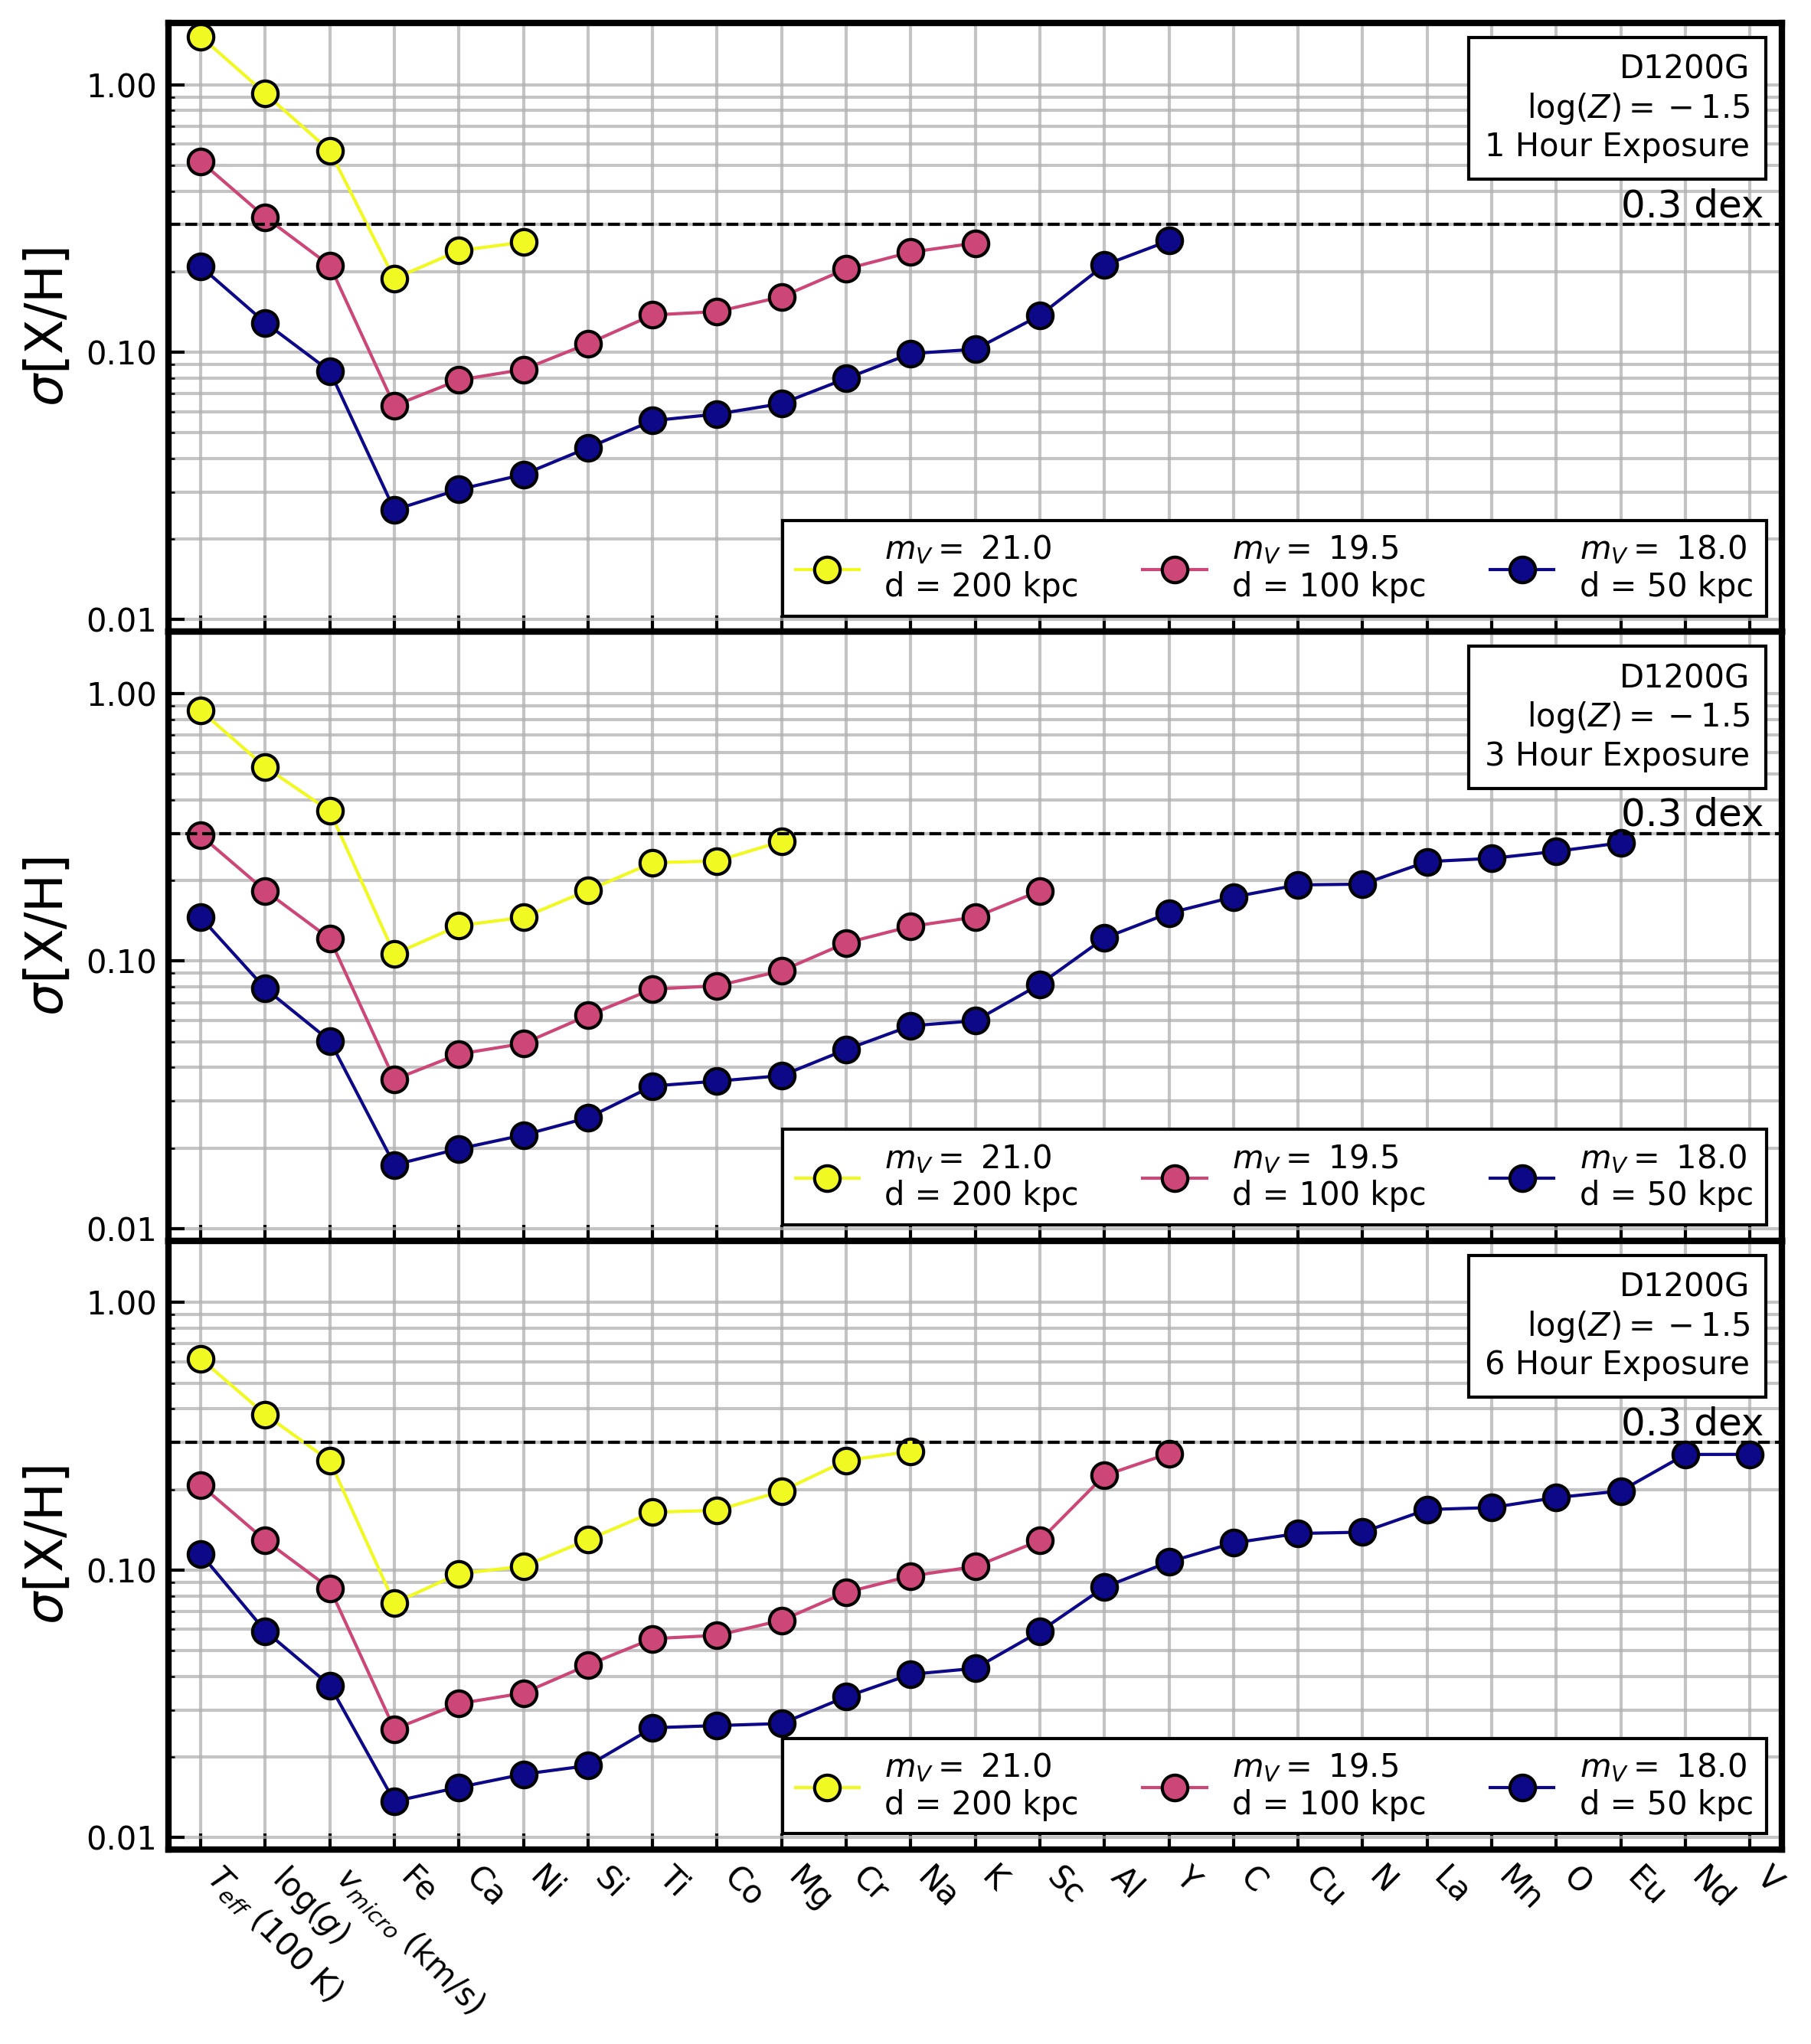

In [4]:
fig = plot_crlb([CRLB_D1200G_1h, CRLB_D1200G_3h, CRLB_D1200G_6h],
                 labels=['D1200G\n$\log(Z)=-1.5$\n1 Hour Exposure',
                         'D1200G\n$\log(Z)=-1.5$\n3 Hour Exposure',
                         'D1200G\n$\log(Z)=-1.5$\n6 Hour Exposure'],
                 cutoff=0.3, cutoff_label_yoffset=0.02,
                 ylim=(0.009, 1.7), 
                 legend_ncol=3, reverse_legend=True)
fig.savefig(output_dir+'crlb_d1200g.png')


## Figure 4: Comparison to Literature Precision (Kirby+ 2018)

In [5]:
# Initialize Preset Instrument
d1200g = inst.AllInst.get_spectrograph('DEIMOS 1200G')
d1200g_mock = inst.AllInst.get_spectrograph('DEIMOS 1200G')
d1200g_mock.name = 'DEIMOS 1200G (mock obs)'

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
RGB.convolve(d1200g)

# Calculate Gradient Spectra
RGB.calc_gradient(d1200g)
RGB.duplicate(d1200g.name, d1200g_mock.name)
RGB.calc_gradient(d1200g_mock)
RGB.zero_gradients(d1200g_mock, ['logg', 'v_micro']) # Intentionally fixed by Kirby+ 2018
RGB.zero_gradients(d1200g_mock, list(set(RGB.gradients['DEIMOS 1200G'].index) ^ {'Teff', 'Ca', 'Fe', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr'}))
RGB.mask_wavelength(d1200g_mock, regions=[(6864, 7020),  # Telluric: A band 
                                          (7591,7703),  # Telluric: B band 
                                          (8225,8265),  # Telluric: other strong absorption
                                          (6341,6346),  # Ca I 6343
                                          (6356,6365),  # Ca I 6362
                                          (6559.797,6565.797),  # H-alpha
                                          (7662,7668),  # K I 7665
                                          (8113,8123),  # V I 8116, 8119
                                          (8317,8330),  # poorly modeled in Arcturus
                                          (8488.023,8508.23),  # Ca II 8498
                                          (8525.091,8561.091),  # Ca II 8452
                                          (8645.141,8679.141),   # Ca II 8662
                                          (8804.756,8809.756),  # Mg 8807
                                         ])

# Initialize CRLB Data Frames
CRLB_KIRBY_COMP = init_crlb_df(RGB)

# Query S/N & Calculate CRLBs
M_V = -0.5  # Absolute Mag of RGB star
m_V = 19.5  # Apparent Mag
dist = int(np.round(mu_to_kpc(m_V - M_V)))
# 1 Hour
d1200G_snr_query_1h = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*3600, mag=m_V, magtype='Vega',
                                          band='Buser_V.dat', template='K0V_pickles_32.fits',
                                          cwave='7000', slitwidth='0.75', binning='1x1',
                                          airmass=1.1, seeing=0.75, redshift=0)
d1200g.set_snr(d1200G_snr_query_1h, fill_value='extrapolate')
d1200g_mock.set_snr(d1200G_snr_query_1h, fill_value='extrapolate')
CRLB_KIRBY_COMP[r'$m_V =$'+f' {m_V:.1f}\nd = {dist} kpc'] = calc_crlb(RGB, d1200g)
CRLB_KIRBY_COMP[r'$m_V =$'+f' {m_V:.1f}\nd = {dist} kpc (mock obs)'] = calc_crlb(RGB, d1200g_mock)
    
# Sort CRLBs & Pretty Up Indices
CRLB_KIRBY_COMP = sort_crlb(CRLB_KIRBY_COMP, cutoff=0.3, fancy_labels=True)

In [6]:
# Query Vizier Catalog
v = Vizier(columns=['**'], row_limit=5000)
table_list = v.get_catalogs('J/ApJS/237/18')
df = table_list[1].to_pandas()[['Syst', 'Name', 'RAJ2000', 'Vmag', 'SN', 'Teff', 'logg',
                                'FeH', 'MgFe', 'SiFe', 'CaFe', 'TiFe', 'CrFe', 'CoFe', 'NiFe',
                                'e_FeH', 'e_MgFe', 'e_SiFe', 'e_CaFe', 'e_TiFe', 'e_CrFe', 'e_CoFe', 'e_NiFe']]
df['Syst'] = [str(i, 'utf-8') for i in df['Syst']]
df.columns = ['Syst', 'Name', 'RA', 'Vmag', 'SN', 'Teff_val', 'logg_val',
              'Fe_val', 'Mg_val', 'Si_val', 'Ca_val', 'Ti_val', 'Cr_val', 'Co_val', 'Ni_val',
              'Fe', 'Mg', 'Si', 'Ca', 'Ti', 'Cr', 'Co', 'Ni']

# Make Cuts to Sample
subset = df[(df['Teff_val'] > 4500) & (df['Teff_val'] < 5000)
             & (df['logg_val'] > 1.7) & (df['logg_val'] < 1.9)
             & (df['Fe_val'] > -2.0) & (df['Fe_val'] < -1.0)
             & (np.isfinite(df['Vmag']))
             & (df['SN'] > 35) & (df['SN'] < 65)]

# Summarize Literature Precision
sigma_kirby = subset[['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr']].T
sigma_kirby.loc[set(sigma_kirby.index) ^ {'Fe'}] = \
    (sigma_kirby.loc[set(sigma_kirby.index) ^ {'Fe'}]**2 - sigma_kirby.loc['Fe']**2)**(1/2)
sigma_kirby_mean = sigma_kirby.mean(axis=1)
sigma_kirby_quart = sigma_kirby.quantile([0.25, 0.75], axis=1)

# Remove Systematic Uncertainties
sigma_syst = pd.DataFrame([0.10, 0.10, 0.10, 0.10, 0.10, 0.20, 0.10, 0.10],
                          index=sigma_kirby.index)
sigma_stat = np.sqrt(sigma_kirby**2 - sigma_syst.values**2)
sigma_stat_mean = sigma_stat.mean(axis=1)
sigma_stat_quart = sigma_stat.quantile([0.25, 0.75], axis=1)

/Users/nathansandford/opt/anaconda3/envs/chemicalc_test/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


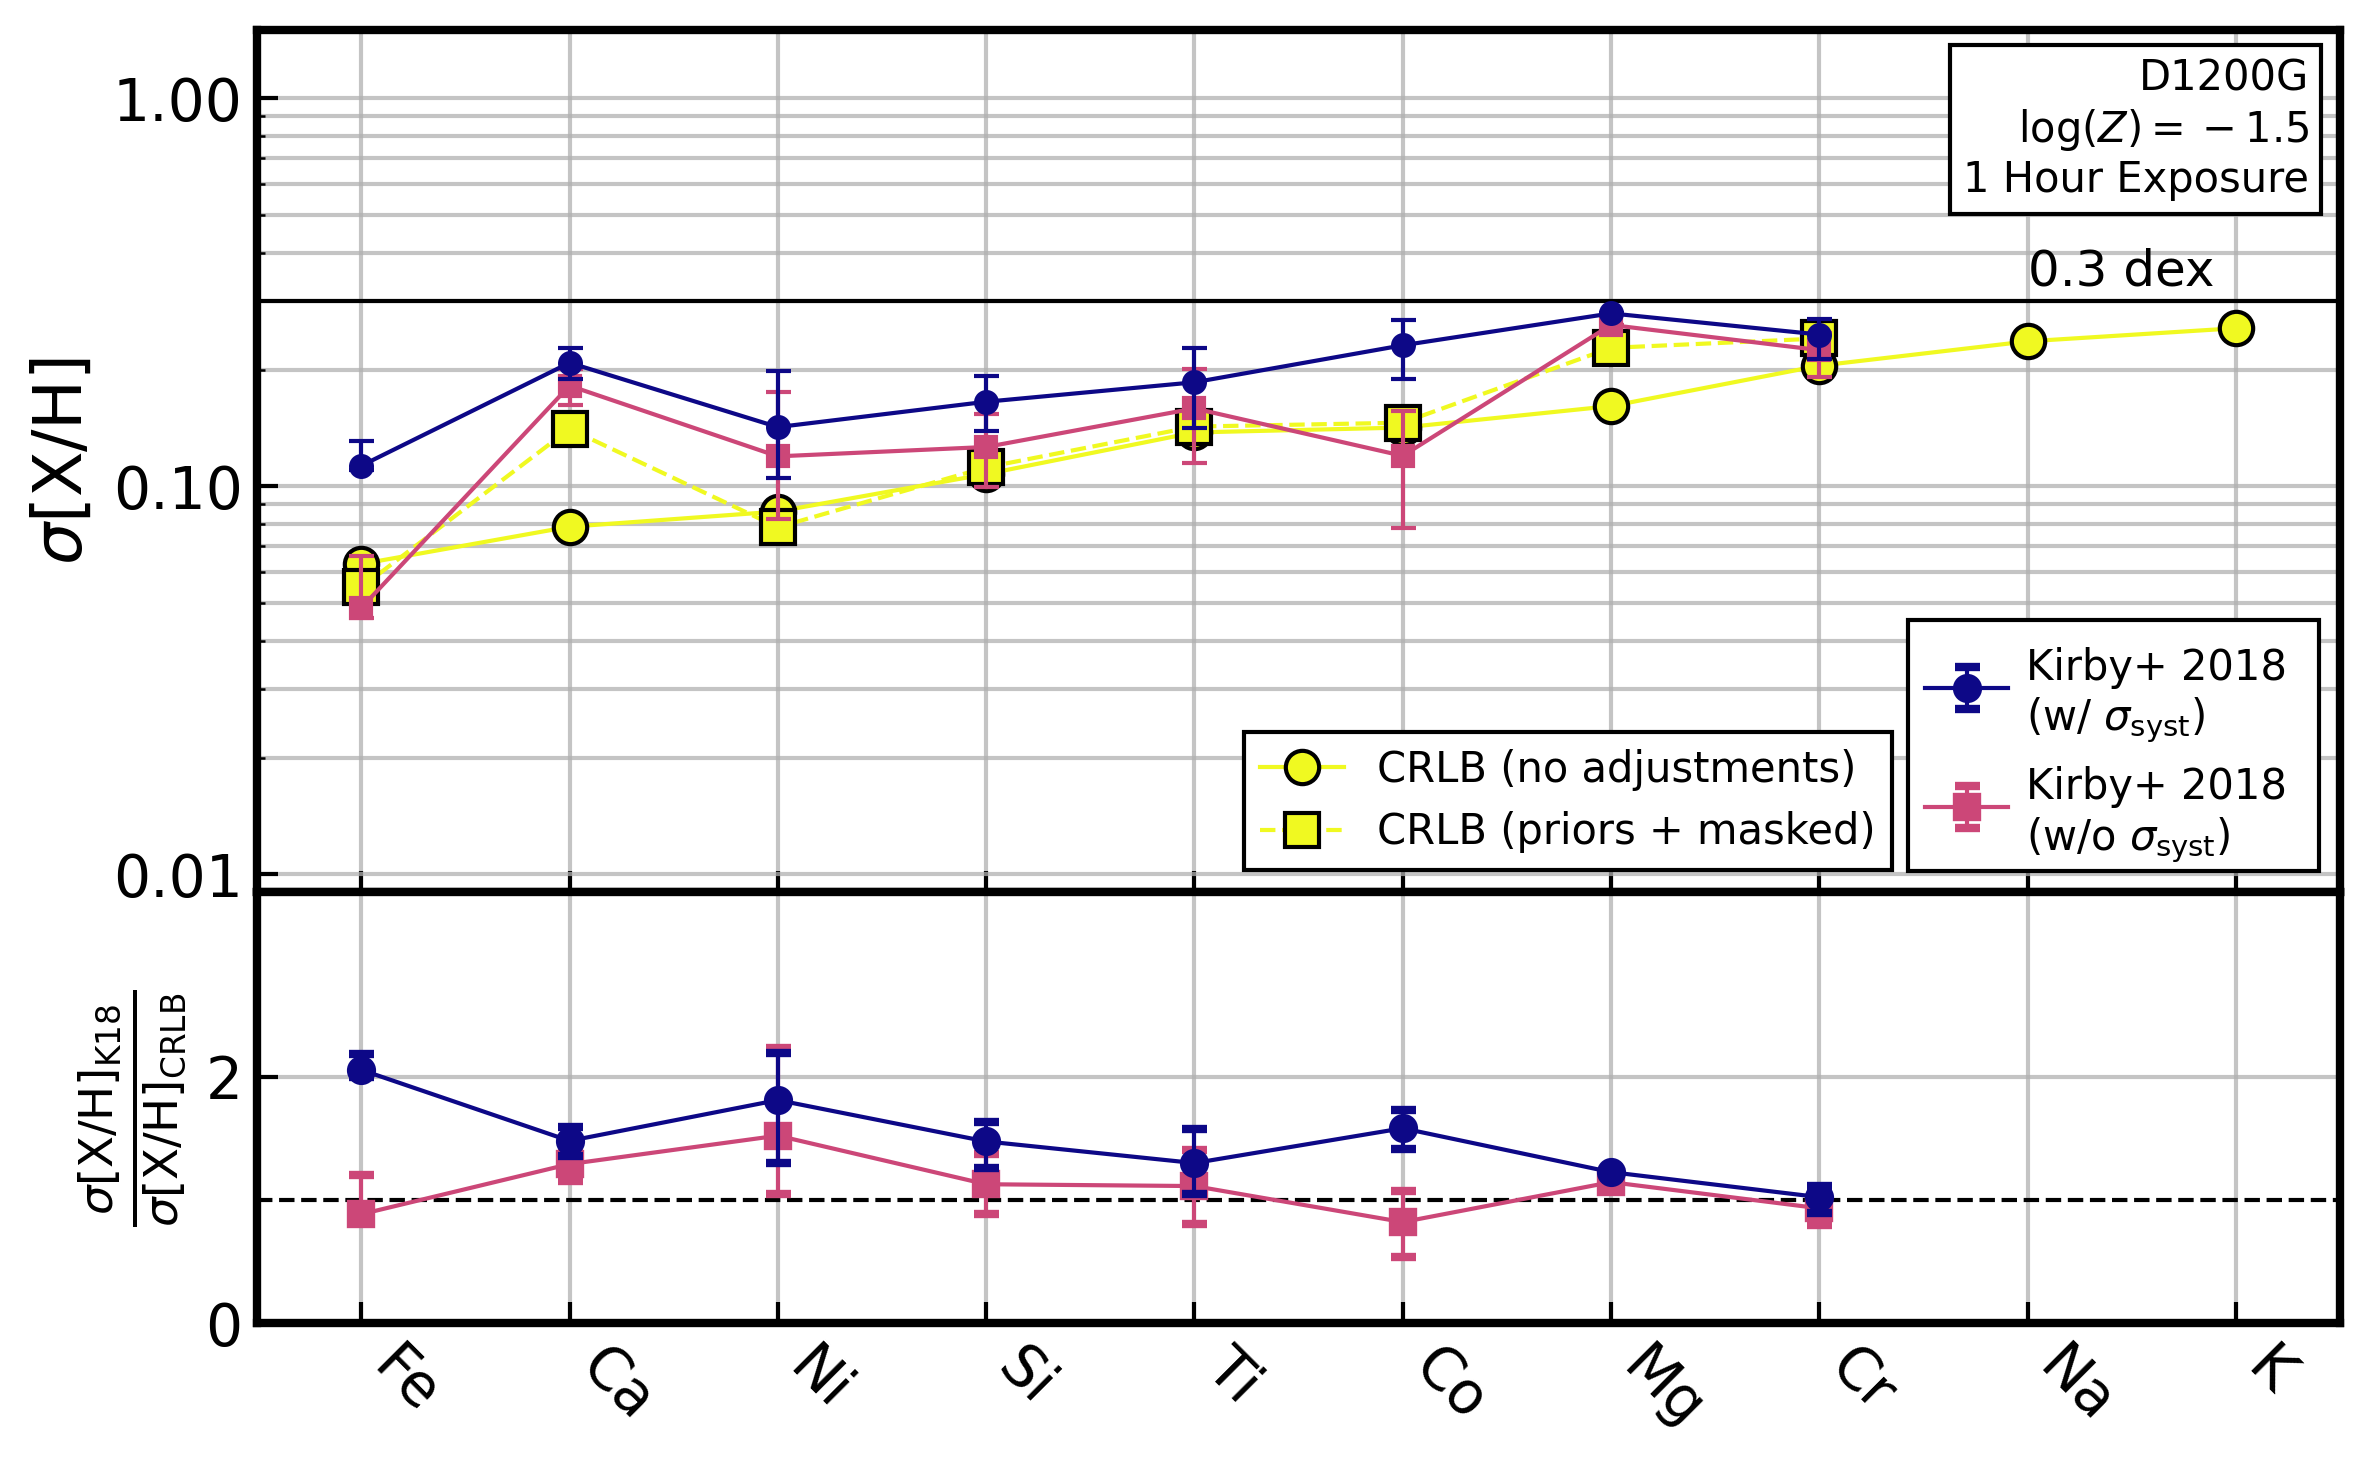

In [7]:
color_palette = 'plasma'
ylim = (0.009, 1.5)

# Drop atmospheric parameters from comparison 
# Compare to 1-hour, V=19.5 CRLB
col1 = '$m_V =$ 19.5\nd = 100 kpc (mock obs)'
crlb_comp1 = CRLB_KIRBY_COMP.iloc[3:, :]
crlb_comp1 = crlb_comp1.loc[:, col1]
col2 = '$m_V =$ 19.5\nd = 100 kpc'
crlb_comp2 = CRLB_KIRBY_COMP.iloc[3:, :]
crlb_comp2 = crlb_comp2.loc[:, col2]


# Initialize Figure
fig = plt.figure(figsize=(8, 5))
gs = GridSpec(2, 1, height_ratios=(2,1))
gs.update(hspace=0.0)
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[1, 0], sharex=ax0)

labs = crlb_comp2.index
nlabs = len(labs)
c = plt.cm.get_cmap(color_palette, 3)

mask = pd.notnull(crlb_comp2.loc[labs].values)
ax0.plot(crlb_comp2.loc[labs].index[mask],
         crlb_comp2.loc[labs].values[mask],
         marker='o', markersize=8, markeredgewidth=1,
         linestyle='-', linewidth=1,
         color=c(2), markeredgecolor='k',
         label='CRLB (no adjustments)',zorder=2)
ax0.plot(crlb_comp1.loc[labs].index[mask],
         crlb_comp1.loc[labs].values[mask],
         marker='s', markersize=8, markeredgewidth=1,
         linestyle='--', linewidth=1,
         color=c(2), markeredgecolor='k',
         label='CRLB (priors + masked)',zorder=2)
ax0.errorbar(x=['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr'],
             y=sigma_stat_mean.T,
             yerr=np.abs(sigma_stat_quart - sigma_stat_mean).values,
             markersize=5, fmt='s-', mfc=c(1), linewidth=1, color=c(1),
             mec=c(1), mew=1, 
             capsize=3, elinewidth=1, ecolor=c(1), zorder=10,)
ax0.errorbar(x=['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr'],
             y=sigma_kirby_mean.T,
             yerr=np.abs(sigma_stat_quart - sigma_stat_mean).values,
             markersize=5, fmt='o-', mfc=c(0), linewidth=1, color=c(0),
             mec=c(0), mew=1, 
             capsize=3, elinewidth=1, ecolor=c(0), zorder=20,)
ax0.axhline(0.3, ls='-', lw=1, c='k')
ax0.text(s='0.3 dex', x=8, y=0.33, fontsize=12)

# Plot Difference
ax1.plot(crlb_comp2.loc[labs].index[mask],
         crlb_comp2.loc[labs].values[mask],
         marker='o', markersize=0, markeredgewidth=0,
         linestyle='-', linewidth=0,
         color=c(2), markeredgecolor='k',
         label=col2)
err1 = ax1.errorbar(x=['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr'],
             y=sigma_stat_mean.T / crlb_comp1.loc[['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr']].values,
             yerr=np.abs(sigma_stat_quart / crlb_comp1.loc[['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr']].values \
                         - sigma_stat_mean / crlb_comp1.loc[['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr']].values).values,
             markersize=5, fmt='s-', mfc=c(1), linewidth=1, color=c(1),
             mec=c(1), mew=2, 
             capsize=3, elinewidth=1, ecolor=c(1), zorder=10)
err2 = ax1.errorbar(x=['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr'],
             y=sigma_kirby_mean.T / crlb_comp1.loc[['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr']].values,
             yerr=np.abs(sigma_kirby_quart / crlb_comp1.loc[['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr']].values \
                         - sigma_kirby_mean / crlb_comp1.loc[['Fe', 'Ca', 'Ni', 'Si', 'Ti', 'Co', 'Mg', 'Cr']].values).values,
             markersize=5, fmt='o-', mfc=c(0), linewidth=1, color=c(0),
             mec=c(0), mew=2, 
             capsize=3, elinewidth=1, ecolor=c(0), zorder=20)
ax1.axhline(1.0, ls='--', lw=1, c='k')

# Axes
ax0.set_ylabel(r'$\sigma$[X/H]', size=16)
ax1.set_ylabel(r'$\frac{\sigma[\mathrm{X/H}]_{\mathrm{K18}}}{\sigma[\mathrm{X/H}]_{\mathrm{CRLB}}}$', size=16)
ax0.set_xlim(-0.5, nlabs - 0.5)
ax0.set_ylim(ylim)
ax1.set_ylim(0.0, 3.5)
ax0.set_yscale('log')
ax0.grid(True, 'both', 'both')
ax1.grid(True, 'both', 'both')
ax0.tick_params(axis='x', labelsize=0)
ax1.tick_params(axis='x', which='major', rotation=-45, labelsize=14)
ax0.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
for j, label in enumerate(ax1.get_xticklabels()):
    label.set_horizontalalignment('left')
ax0.yaxis.set_major_formatter(StrMethodFormatter("{x:.2f}"))

# Legends
ax0.legend(fontsize=12, ncol=1, loc='lower right', edgecolor='k')
plt.text(0.985, 0.968, s='D1200G\n$\log(Z)=-1.5$\n1 Hour Exposure', fontsize=10,
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax0.transAxes,
         bbox=dict(facecolor='white', edgecolor='black', pad=3.0))
handles, labels = fig.axes[0].get_legend_handles_labels()
fig.axes[0].legend(handles[:], labels[:], fontsize=10,
                   ncol=1, bbox_to_anchor=(0.805, 0.234), edgecolor='k')
custom_lines = [Line2D([0], [0], color='k', marker='o', linestyle='None', ms=5)]
leg2 = fig.axes[0].legend([err2, err1], ['Kirby+ 2018\n'+r'(w/ $\sigma_\mathrm{syst}$)',
                                         'Kirby+ 2018\n'+r'(w/o $\sigma_\mathrm{syst}$)'],
                          fontsize=10,
                          #bbox_to_anchor=(0.77, 0.520),
                          loc='lower right', edgecolor='k')
for t in leg2.get_texts():
    t.set_position((-15,-10))
fig.axes[0].add_artist(leg2)
handles, labels = fig.axes[0].get_legend_handles_labels()
fig.axes[0].legend(handles, labels, fontsize=10,
                   ncol=1, bbox_to_anchor=(0.795, 0.21), edgecolor='k')

plt.tight_layout()
fig.savefig(output_dir+'crlb_lit_deimos.png')
plt.show()


## Figure 5: D1200G CRLBs v. $\log(Z)$


In [8]:
# Initialize Preset Instrument
d1200g = inst.AllInst.get_spectrograph('DEIMOS 1200G')

# Initialize Reference Spectra
RGB_m05 = ref.ReferenceSpectra(reference='RGB_m0.5', alpha_included=False)
RGB_m10 = ref.ReferenceSpectra(reference='RGB_m1.0')
RGB_m15 = ref.ReferenceSpectra(reference='RGB_m1.5')
RGB_m20 = ref.ReferenceSpectra(reference='RGB_m2.0')
RGB_m25 = ref.ReferenceSpectra(reference='RGB_m2.5')

# Convolve Reference Spectra to Instrument Resolution
RGB_m05.convolve(d1200g)
RGB_m10.convolve(d1200g)
RGB_m15.convolve(d1200g)
RGB_m20.convolve(d1200g)
RGB_m25.convolve(d1200g)

# Calculate Gradient Spectra
RGB_m05.calc_gradient(d1200g)
RGB_m10.calc_gradient(d1200g)
RGB_m15.calc_gradient(d1200g)
RGB_m20.calc_gradient(d1200g)
RGB_m25.calc_gradient(d1200g)

# Initialize CRLB Data Frames
CRLB_D1200G_logz = init_crlb_df(RGB_m15)

# Query S/N & Calculate CRLBs
m_V = 19.5
# log(Z) > -1.5
d1200G_snr_query_1h_k5 = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*3600, mag=m_V, magtype='Vega',
                                             band='Buser_V.dat', template='K5V_pickles_36.fits',
                                             cwave='7000', slitwidth='0.75', binning='1x1',
                                             airmass=1.1, seeing=0.75, redshift=0)
d1200g.set_snr(d1200G_snr_query_1h_k5, fill_value='extrapolate')
CRLB_D1200G_logz[r'$\log(Z) = -0.5$'] = calc_crlb(RGB_m05, d1200g)
CRLB_D1200G_logz[r'$\log(Z) = -1.0$'] = calc_crlb(RGB_m10, d1200g)
# log(Z) <= -1.5
d1200G_snr_query_1h_k0 = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*3600, mag=m_V, magtype='Vega',
                                             band='Buser_V.dat', template='K0V_pickles_32.fits',
                                             cwave='7000', slitwidth='0.75', binning='1x1',
                                             airmass=1.1, seeing=0.75, redshift=0)
d1200g.set_snr(d1200G_snr_query_1h_k0, fill_value='extrapolate')
CRLB_D1200G_logz[r'$\log(Z) = -1.5$'] = calc_crlb(RGB_m15, d1200g)
CRLB_D1200G_logz[r'$\log(Z) = -2.0$'] = calc_crlb(RGB_m20, d1200g)
CRLB_D1200G_logz[r'$\log(Z) = -2.5$'] = calc_crlb(RGB_m25, d1200g)

# Sort CRLBs & Pretty Up Indices
CRLB_D1200G_logz = sort_crlb(CRLB_D1200G_logz, cutoff=0.3, fancy_labels=True)

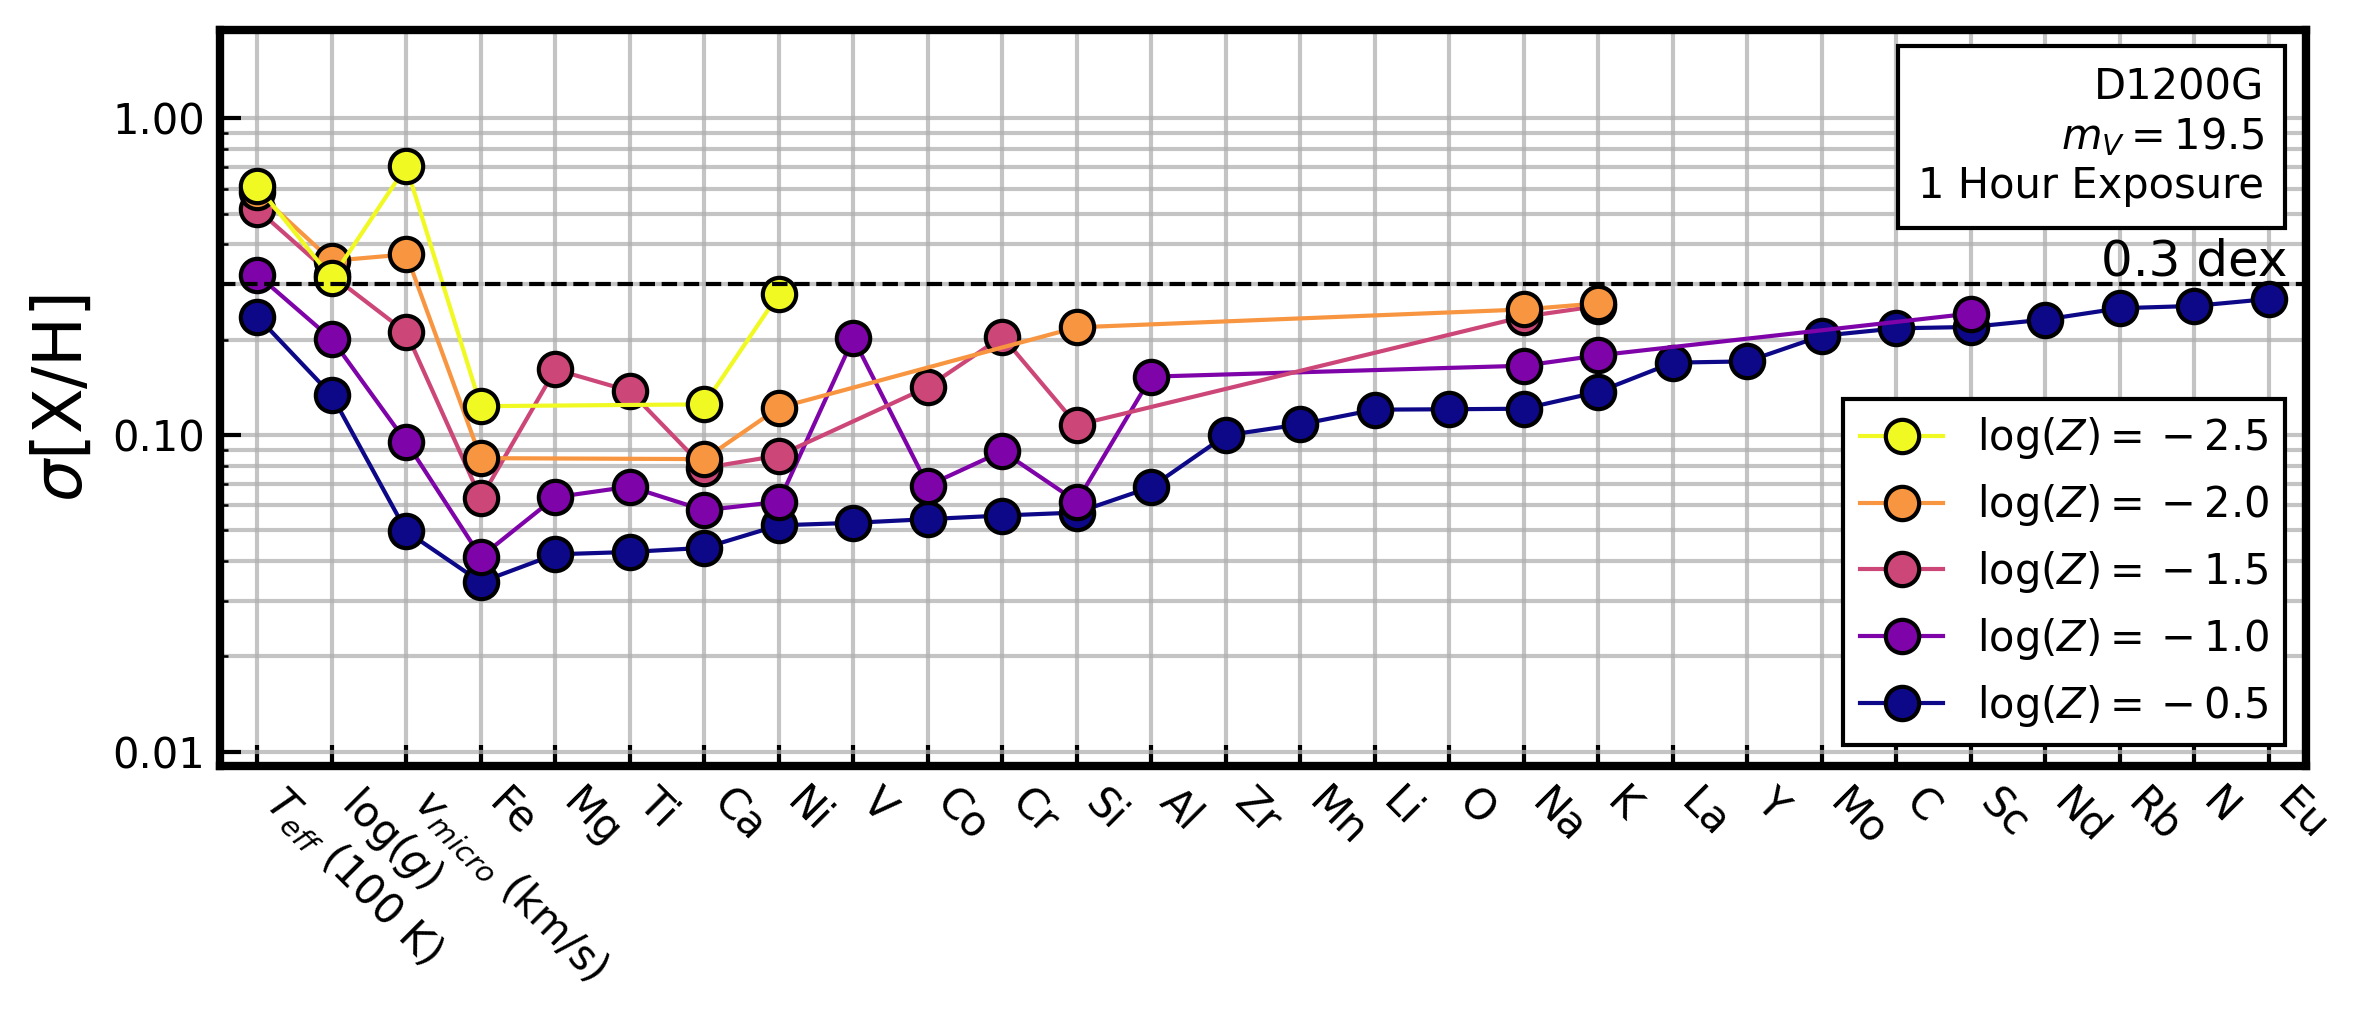

In [9]:
fig = plot_crlb([CRLB_D1200G_logz],
                 labels=['D1200G\n$m_V=19.5$\n1 Hour Exposure'],
                 ylim=(0.009, 1.9), panel_height=3.5,
                 cutoff=0.3, cutoff_label_xoffset=3.25, cutoff_label_yoffset=0.02,
                 legend_ncol=1, reverse_legend=True)
fig.savefig(output_dir+'crlb_feh.png')


## Figure 6: D1200G CRLBs v. Phase

In [10]:
# Initialize Preset Instrument
d1200g = inst.AllInst.get_spectrograph('DEIMOS 1200G')

# Initialize Reference Spectra
TRGB_m15 = ref.ReferenceSpectra(reference='TRGB_m1.5')
RGB_m15 = ref.ReferenceSpectra(reference='RGB_m1.5')
MSTO_m15 = ref.ReferenceSpectra(reference='MSTO_m1.5')

# Convolve Reference Spectra to Instrument Resolution
TRGB_m15.convolve(d1200g)
RGB_m15.convolve(d1200g)
MSTO_m15.convolve(d1200g)

# Calculate Gradient Spectra
TRGB_m15.calc_gradient(d1200g)
RGB_m15.calc_gradient(d1200g)
MSTO_m15.calc_gradient(d1200g)

# Initialize CRLB Data Frames
CRLB_D1200G_phase = init_crlb_df(RGB_m15)

# Query S/N & Calculate CRLBs
m_V = 19.5
# TRGB
d1200G_snr_query_1h_k5 = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*3600, mag=m_V, magtype='Vega',
                                             band='Buser_V.dat', template='K5V_pickles_36.fits',
                                             cwave='7000', slitwidth='0.75', binning='1x1',
                                             airmass=1.1, seeing=0.75, redshift=0)
d1200g.set_snr(d1200G_snr_query_1h_k5, fill_value='extrapolate')
CRLB_D1200G_phase[f'TRGB'] = calc_crlb(TRGB_m15, d1200g)
# RGB
d1200G_snr_query_1h_k0 = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*3600, mag=m_V, magtype='Vega',
                                             band='Buser_V.dat', template='K0V_pickles_32.fits',
                                             cwave='7000', slitwidth='0.75', binning='1x1',
                                             airmass=1.1, seeing=0.75, redshift=0)
d1200g.set_snr(d1200G_snr_query_1h_k0, fill_value='extrapolate')
CRLB_D1200G_phase[f'RGB'] = calc_crlb(RGB_m15, d1200g)
# MSTO
d1200G_snr_query_1h_g5 = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*3600, mag=m_V, magtype='Vega',
                                             band='Buser_V.dat', template='G5V_pickles_27.fits',
                                             cwave='7000', slitwidth='0.75', binning='1x1',
                                             airmass=1.1, seeing=0.75, redshift=0)
d1200g.set_snr(d1200G_snr_query_1h_g5, fill_value='extrapolate')
CRLB_D1200G_phase[f'MSTO'] = calc_crlb(MSTO_m15, d1200g)

# Sort CRLBs & Pretty Up Indices
CRLB_D1200G_phase = sort_crlb(CRLB_D1200G_phase, cutoff=0.3, fancy_labels=True)

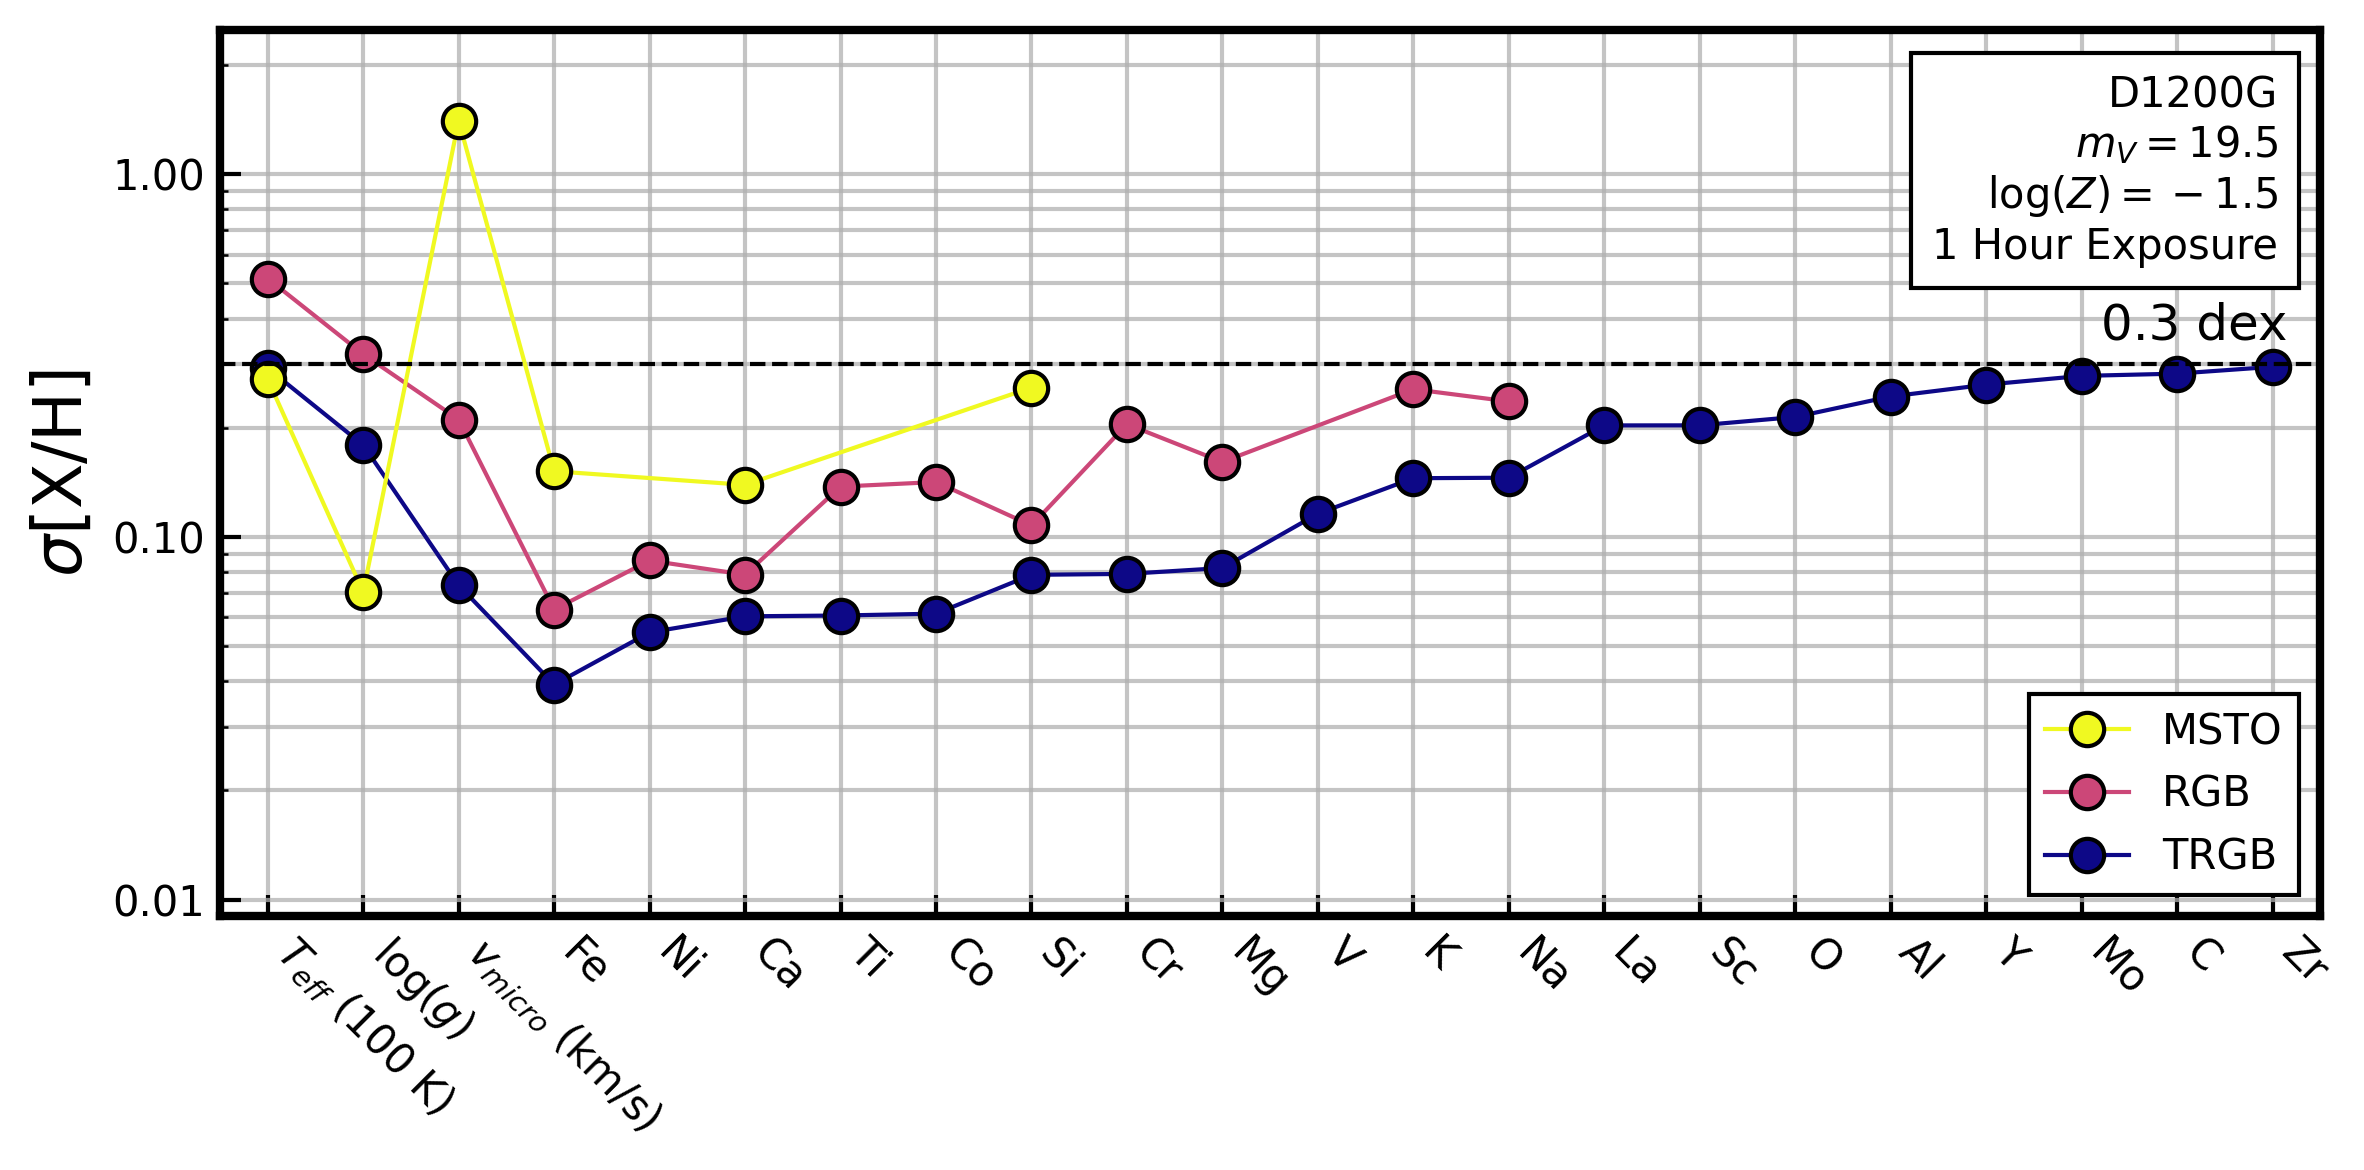

In [11]:
fig = plot_crlb([CRLB_D1200G_phase],
                 labels=['D1200G\n$m_V=19.5$\n$\log(Z)=-1.5$\n1 Hour Exposure'],
                 ylim=(0.009, 2.5), panel_height=4, cutoff=0.3, cutoff_label_xoffset=2.8,
                 legend_ncol=1, reverse_legend=True)
fig.savefig(output_dir+'crlb_phase.png')


## Figure 7: D1200G CRLBs w/ Priors

In [12]:
# Initialize Preset Instrument
d1200g = inst.AllInst.get_spectrograph('DEIMOS 1200G')

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
RGB.convolve(d1200g)

# Calculate Gradient Spectra
RGB.calc_gradient(d1200g)

# Initialize CRLB Data Frames
CRLB_D1200G_1h_prior = init_crlb_df(RGB)
CRLB_D1200G_1h_noprior = init_crlb_df(RGB)

# Define Prior
priors = {'Teff': 100, 'logg': 0.15, 'v_micro': 0.25}

# Query S/N & Calculate CRLBs
M_V = -0.5  # Absolute Mag of RGB star
m_V_list = np.array([18.0, 19.5, 21.0])  # Apparent Mag
for m_V in m_V_list:
    dist = int(np.round(mu_to_kpc(m_V - M_V)))
    d1200G_snr_query_1h = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*3600, mag=m_V, magtype='Vega',
                                              band='Buser_V.dat', template='K0V_pickles_32.fits',
                                              cwave='7000', slitwidth='0.75', binning='1x1',
                                              airmass=1.1, seeing=0.75, redshift=0)
    d1200g.set_snr(d1200G_snr_query_1h, fill_value='extrapolate')
    CRLB_D1200G_1h_prior[r'$m_V =$'+f' {m_V:.1f}\nd = {dist} kpc'] = calc_crlb(RGB, d1200g, priors=priors)
    CRLB_D1200G_1h_noprior[r'$m_V =$'+f' {m_V:.1f}\nd = {dist} kpc'] = calc_crlb(RGB, d1200g)

# Sort CRLBs & Pretty Up Indices
CRLB_D1200G_1h_prior = sort_crlb(CRLB_D1200G_1h_prior, cutoff=0.3, fancy_labels=True)
CRLB_D1200G_1h_noprior = sort_crlb(CRLB_D1200G_1h_noprior, cutoff=0.3, fancy_labels=True)
CRLB_D1200G_1h_prior.index = [r'$T_{eff}$ (100 K)', r'$\log(g)$', r'$v_{micro}$ (km/s)'] \
                             + list(CRLB_D1200G_1h_prior.index[3:])
CRLB_D1200G_1h_noprior.index = [r'$T_{eff}$ (100 K)', r'$\log(g)$', r'$v_{micro}$ (km/s)'] \
                               + list(CRLB_D1200G_1h_noprior.index[3:])


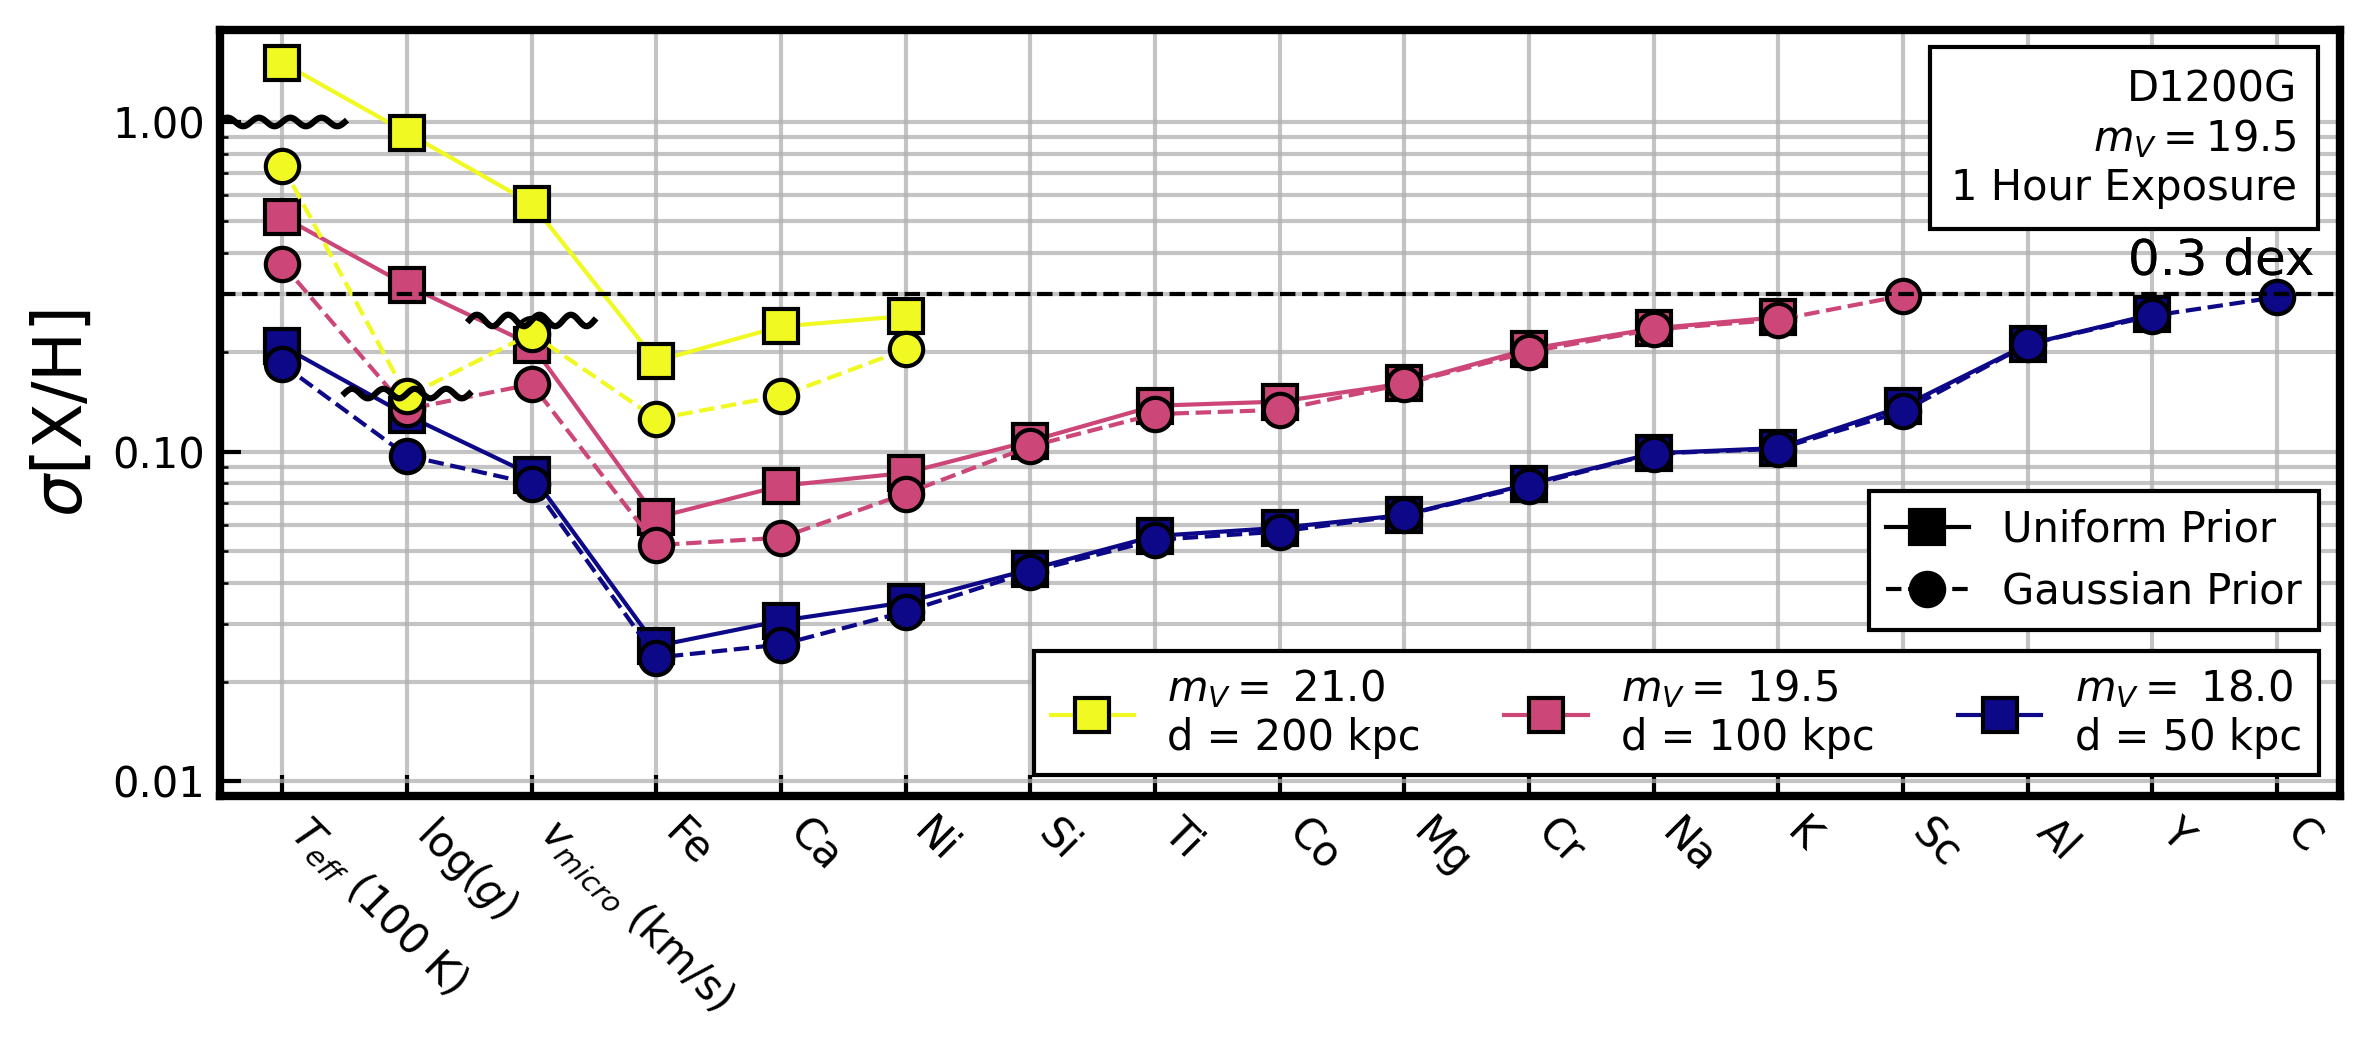

In [13]:
fig = overplot_crlb([CRLB_D1200G_1h_noprior, CRLB_D1200G_1h_prior], ['Uniform Prior', 'Gaussian Prior'],
                     labels=['D1200G\n$m_V=19.5$\n1 Hour Exposure'],# additional_lines=prior_lines,
                     ylim=(0.009, 1.9), panel_height=3.6,
                     cutoff=0.3, cutoff_label_xoffset=2.2, cutoff_label_yoffset=0.045,
                     legend_ncol=3, reverse_legend=True)
# Annotate Priors
fig.axes[0].plot(np.linspace(-0.5, 0.5, 100), 1+0.03*np.sin(25*np.linspace(-0.5, 0.5, 100)), c='k')
fig.axes[0].plot(np.linspace(0.5, 1.5, 100), 0.15+0.005*np.sin(25*np.linspace(-0.5, 0.5, 100)), c='k')
fig.axes[0].plot(np.linspace(1.5, 2.5, 100), 0.25+0.01*np.sin(25*np.linspace(-0.5, 0.5, 100)), c='k')
fig.savefig(output_dir+'crlb_d1200g_priors.png')

## Figure 8: Low-Resolution MOS (Keck) CRLBs

In [14]:
# Initialize Preset Instrument
d1200g = inst.AllInst.get_spectrograph('DEIMOS 1200G')
d1200b = inst.AllInst.get_spectrograph('DEIMOS 1200B')
d600zd = inst.AllInst.get_spectrograph('DEIMOS 600ZD')
d900zd = inst.AllInst.get_spectrograph('DEIMOS 900ZD')
lrisr = inst.AllInst.get_spectrograph('LRIS 1200/7500 (r)')
lrisb = inst.AllInst.get_spectrograph('LRIS 600/4000 (b)')

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
RGB.convolve(d1200g)
RGB.convolve(d1200b)
RGB.convolve(d600zd)
RGB.convolve(d900zd)
RGB.convolve(lrisb)
RGB.convolve(lrisr)

# Calculate Gradient Spectra
RGB.calc_gradient(d1200g)
RGB.calc_gradient(d1200b)
RGB.calc_gradient(d600zd)
RGB.calc_gradient(d900zd)
RGB.calc_gradient(lrisb)
RGB.calc_gradient(lrisr)

# Initialize CRLB Data Frames
CRLB_keck_blue = init_crlb_df(RGB)

# Query S/N
m_V = 19.5
# D1200G
d1200g_snr_query_1h = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*3600, mag=m_V, magtype='Vega',
                                          band='Buser_V.dat', template='K0V_pickles_32.fits',
                                          cwave='7000', slitwidth='0.75', binning='1x1',
                                          airmass=1.1, seeing=0.75, redshift=0)
d1200g.set_snr(d1200g_snr_query_1h, fill_value='extrapolate')
# D1200B
d1200b_snr_query_1h = s2n.Sig2NoiseDEIMOS(grating='1200B', exptime=1*3600, mag=m_V, magtype='Vega',
                                          band='Buser_V.dat', template='K0V_pickles_32.fits',
                                          cwave='6000', slitwidth='0.75', binning='1x1',
                                          airmass=1.1, seeing=0.75, redshift=0)
d1200b.set_snr(d1200b_snr_query_1h, fill_value='extrapolate')
# D600ZD
d600zd_snr_query_1h = s2n.Sig2NoiseDEIMOS(grating='600Z', exptime=1*3600, mag=m_V, magtype='Vega',
                                          band='Buser_V.dat', template='K0V_pickles_32.fits',
                                          cwave='6000', slitwidth='0.75', binning='1x1',
                                          airmass=1.1, seeing=0.75, redshift=0)
d600zd.set_snr(d600zd_snr_query_1h, fill_value='extrapolate')
# D900ZD
d900zd_snr_query_1h = s2n.Sig2NoiseDEIMOS(grating='900Z', exptime=1*3600, mag=m_V, magtype='Vega',
                                          band='Buser_V.dat', template='K0V_pickles_32.fits',
                                          cwave='6000', slitwidth='0.75', binning='1x1',
                                          airmass=1.1, seeing=0.75, redshift=0)
d900zd.set_snr(d900zd_snr_query_1h, fill_value='extrapolate')
# LRIS 600/4000 + LRIS 1200/9000 (sub for LRIS 1200/7500)
lris_snr_query = s2n.Sig2NoiseLRIS(grating='1200/9000', grism='B600', dichroic='D560',
                                   exptime=1*3600, mag=m_V, magtype='Vega', band='Buser_V.dat',
                                   template='K0V_pickles_32.fits', slitwidth='0.7', binning='1x1',
                                   airmass=1.1, seeing=0.75, redshift=0) 
lrisb.set_snr(lris_snr_query, fill_value='extrapolate')
lrisr.set_snr(lris_snr_query, fill_value='extrapolate')

# Calculate CRLBs
CRLB_keck_blue['LRIS'] = calc_crlb(RGB, [lrisr, lrisb])
CRLB_keck_blue[d1200b.name] = calc_crlb(RGB, d1200b)
CRLB_keck_blue[d900zd.name] = calc_crlb(RGB, d900zd)
CRLB_keck_blue[d600zd.name] = calc_crlb(RGB, d600zd)
CRLB_keck_blue[d1200g.name] = calc_crlb(RGB, d1200g)

# Sort CRLBs & Pretty Up Indices
CRLB_keck_blue = sort_crlb(CRLB_keck_blue, cutoff=0.3, fancy_labels=True)

/Users/nathansandford/github_repos/Chem-I-Calc/chemicalc/crlb.py:82: RuntimeWarning: divide by zero encountered in power
  flux_var = instrument.snr ** (-2)


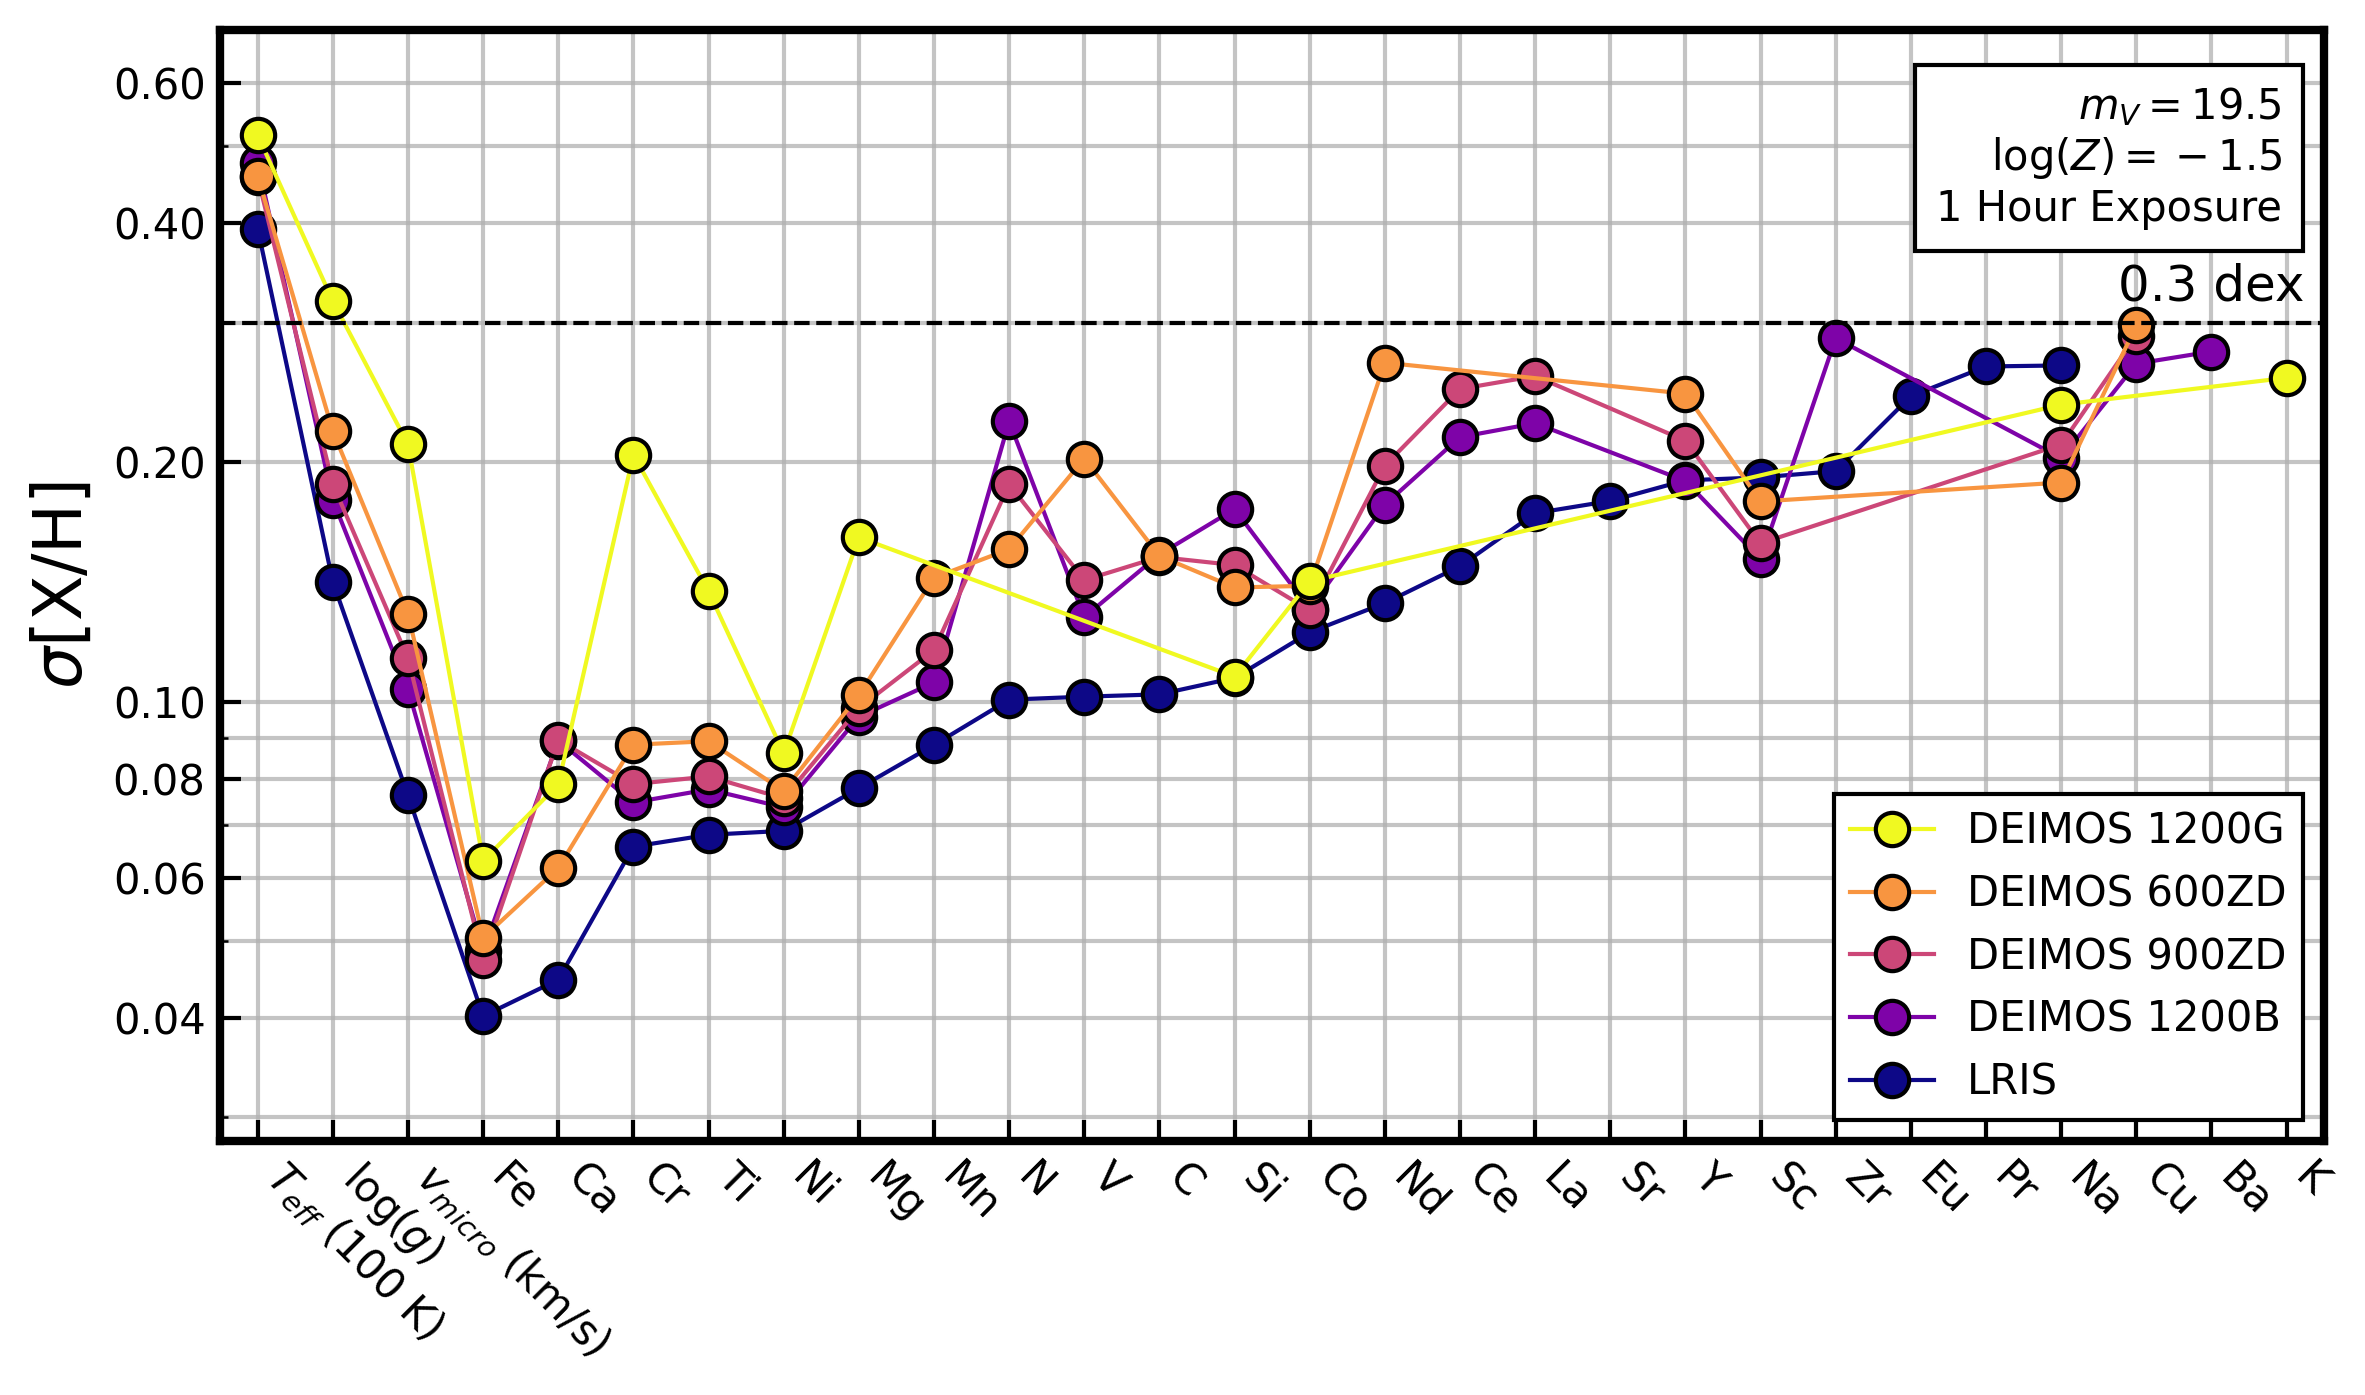

In [15]:
fig = plot_crlb([CRLB_keck_blue],
                 labels=['$m_V=19.5$\n$\log(Z)=-1.5$\n1 Hour Exposure'],
                 ylim=(0.028, 0.7), yticks=[0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6],
                 panel_height=4.75,
                 cutoff=0.3, cutoff_label_xoffset=3.25, cutoff_label_yoffset=0.02,
                 legend_ncol=1, reverse_legend=True)
fig.savefig(output_dir+'crlb_blue.png')

## Figure 9: Low-Resolution MOS (other) CRLBs

In [16]:
# Initialize Preset Instrument
mods_b = inst.AllInst.get_spectrograph('MODS (b)')
mods_r = inst.AllInst.get_spectrograph('MODS (r)')
hspec_270 = inst.AllInst.get_spectrograph('Hectospec 270')
hspec_600 = inst.AllInst.get_spectrograph('Hectospec 600')
bspec_270 = inst.AllInst.get_spectrograph('Binospec 270')
bspec_600a = inst.AllInst.get_spectrograph('Binospec 600a')
bspec_1000 = inst.AllInst.get_spectrograph('Binospec 1000')
muse_nom = inst.AllInst.get_spectrograph('MUSE (nominal)')

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
RGB.convolve(mods_b)
RGB.convolve(mods_r)
RGB.convolve(hspec_270)
RGB.convolve(hspec_600)
RGB.convolve(bspec_270)
RGB.convolve(bspec_600a)
RGB.convolve(bspec_1000)
RGB.convolve(muse_nom)

# Calculate Gradient Spectra
RGB.calc_gradient(mods_b)
RGB.calc_gradient(mods_r)
RGB.calc_gradient(hspec_270)
RGB.calc_gradient(hspec_600)
RGB.calc_gradient(bspec_270)
RGB.calc_gradient(bspec_600a)
RGB.calc_gradient(bspec_1000)
RGB.calc_gradient(muse_nom)

# Set S/N for All Instruments
# MODS
# Flux of V = 19.5 (g = 19.8) RGB star
RGB_g198 = np.load('./etc_files/RGB_g19.8_R2000.npz')
snr_mods = s2n.calculate_mods_snr(RGB_g198['spec'], RGB_g198['wave'],
                                  t_exp=3600, airmass=1.1, mode='dichroic')
mods_b.set_snr(snr_mods, fill_value='extrapolate')
mods_r.set_snr(snr_mods, fill_value='extrapolate')
# Hectospec
hspec270_snr_query_1h = s2n.Sig2NoiseHectoBinoSpec(inst_mode="HECTOSPEC_270", exptime=1*3600,
                                                   mag=19.8, band='g_filt', template='K0V',
                                                   seeing=0.75, airmass=1.1, moonage=0.0,
                                                   aptype='Round', apwidth=1.5)
hspec600_snr_query_1h = s2n.Sig2NoiseHectoBinoSpec(inst_mode="HECTOSPEC_600", exptime=1*3600,
                                                   mag=19.8, band='g_filt', template='K0V',
                                                   seeing=0.75, airmass=1.1, moonage=0.0,
                                                   aptype='Round', apwidth=1.5)
hspec_270.set_snr(hspec270_snr_query_1h, fill_value='extrapolate')
hspec_600.set_snr(hspec600_snr_query_1h, fill_value='extrapolate')
hspec_270.snr *= (5)**(-1/2)
hspec_600.snr *= (5)**(-1/2)
# Binospec
bspec270_snr_query_1h = s2n.Sig2NoiseHectoBinoSpec(inst_mode="BINOSPEC_270", exptime=1*3600,
                                                   mag=19.8, band='g_filt', template='K0V',
                                                   seeing=0.75, airmass=1.1, moonage=0.0,
                                                   aptype='Round', apwidth=1.0)
bspec600_snr_query_1h = s2n.Sig2NoiseHectoBinoSpec(inst_mode="BINOSPEC_600", exptime=1*3600,
                                                   mag=19.8, band='g_filt', template='K0V',
                                                   seeing=0.75, airmass=1.1, moonage=0.0,
                                                   aptype='Round', apwidth=1.0)
bspec1000_snr_query_1h = s2n.Sig2NoiseHectoBinoSpec(inst_mode="BINOSPEC_1000", exptime=1*3600,
                                                    mag=19.8, band='g_filt', template='K0V',
                                                    seeing=0.75, airmass=1.1, moonage=0.0,
                                                    aptype='Round', apwidth=1.0)
bspec_270.set_snr(bspec270_snr_query_1h, fill_value='extrapolate')
bspec_600a.set_snr(bspec600_snr_query_1h, fill_value='extrapolate')
bspec_1000.set_snr(bspec1000_snr_query_1h, fill_value='extrapolate')
bspec_270.snr *= (4)**(-1/2)
bspec_600a.snr *= (3)**(-1/2)
bspec_1000.snr *= (3)**(-1/2)
# MUSE
muse_snr_query_1h = s2n.Sig2NoiseMUSE(exptime=1*3600,
                                      mode='WFM_NONAO_N', spatial_binning='3', spectra_binning='1', target_offset=0,
                                      mag=19.5, band='V', magtype='Vega',
                                      template_type='template_spectrum', template='Pickles_K2V',
                                      airmass=1.1, seeing='0.8', moon_phase=0, redshift=0)
muse_nom.set_snr(muse_snr_query_1h, fill_value='extrapolate')

# Initialize CRLB Data Frames
CRLB_other_blue = init_crlb_df(RGB)

# Calculate CRLBs
CRLB_other_blue['MODS'] = calc_crlb(RGB, [mods_b, mods_r])
CRLB_other_blue['MUSE'] = calc_crlb(RGB, muse_nom)
CRLB_other_blue['Binospec 1000'] = calc_crlb(RGB, bspec_1000)
CRLB_other_blue['Binospec 600'] = calc_crlb(RGB, bspec_600a)
CRLB_other_blue['Binospec 270'] = calc_crlb(RGB, bspec_270)
CRLB_other_blue['Hectospec 600'] = calc_crlb(RGB, hspec_600)
CRLB_other_blue['Hectospec 270'] = calc_crlb(RGB, hspec_270)

# Sort CRLBs & Pretty Up Indices
CRLB_other_blue = sort_crlb(CRLB_other_blue, cutoff=0.3, fancy_labels=True)

/Users/nathansandford/github_repos/Chem-I-Calc/chemicalc/crlb.py:82: RuntimeWarning: divide by zero encountered in power
  flux_var = instrument.snr ** (-2)


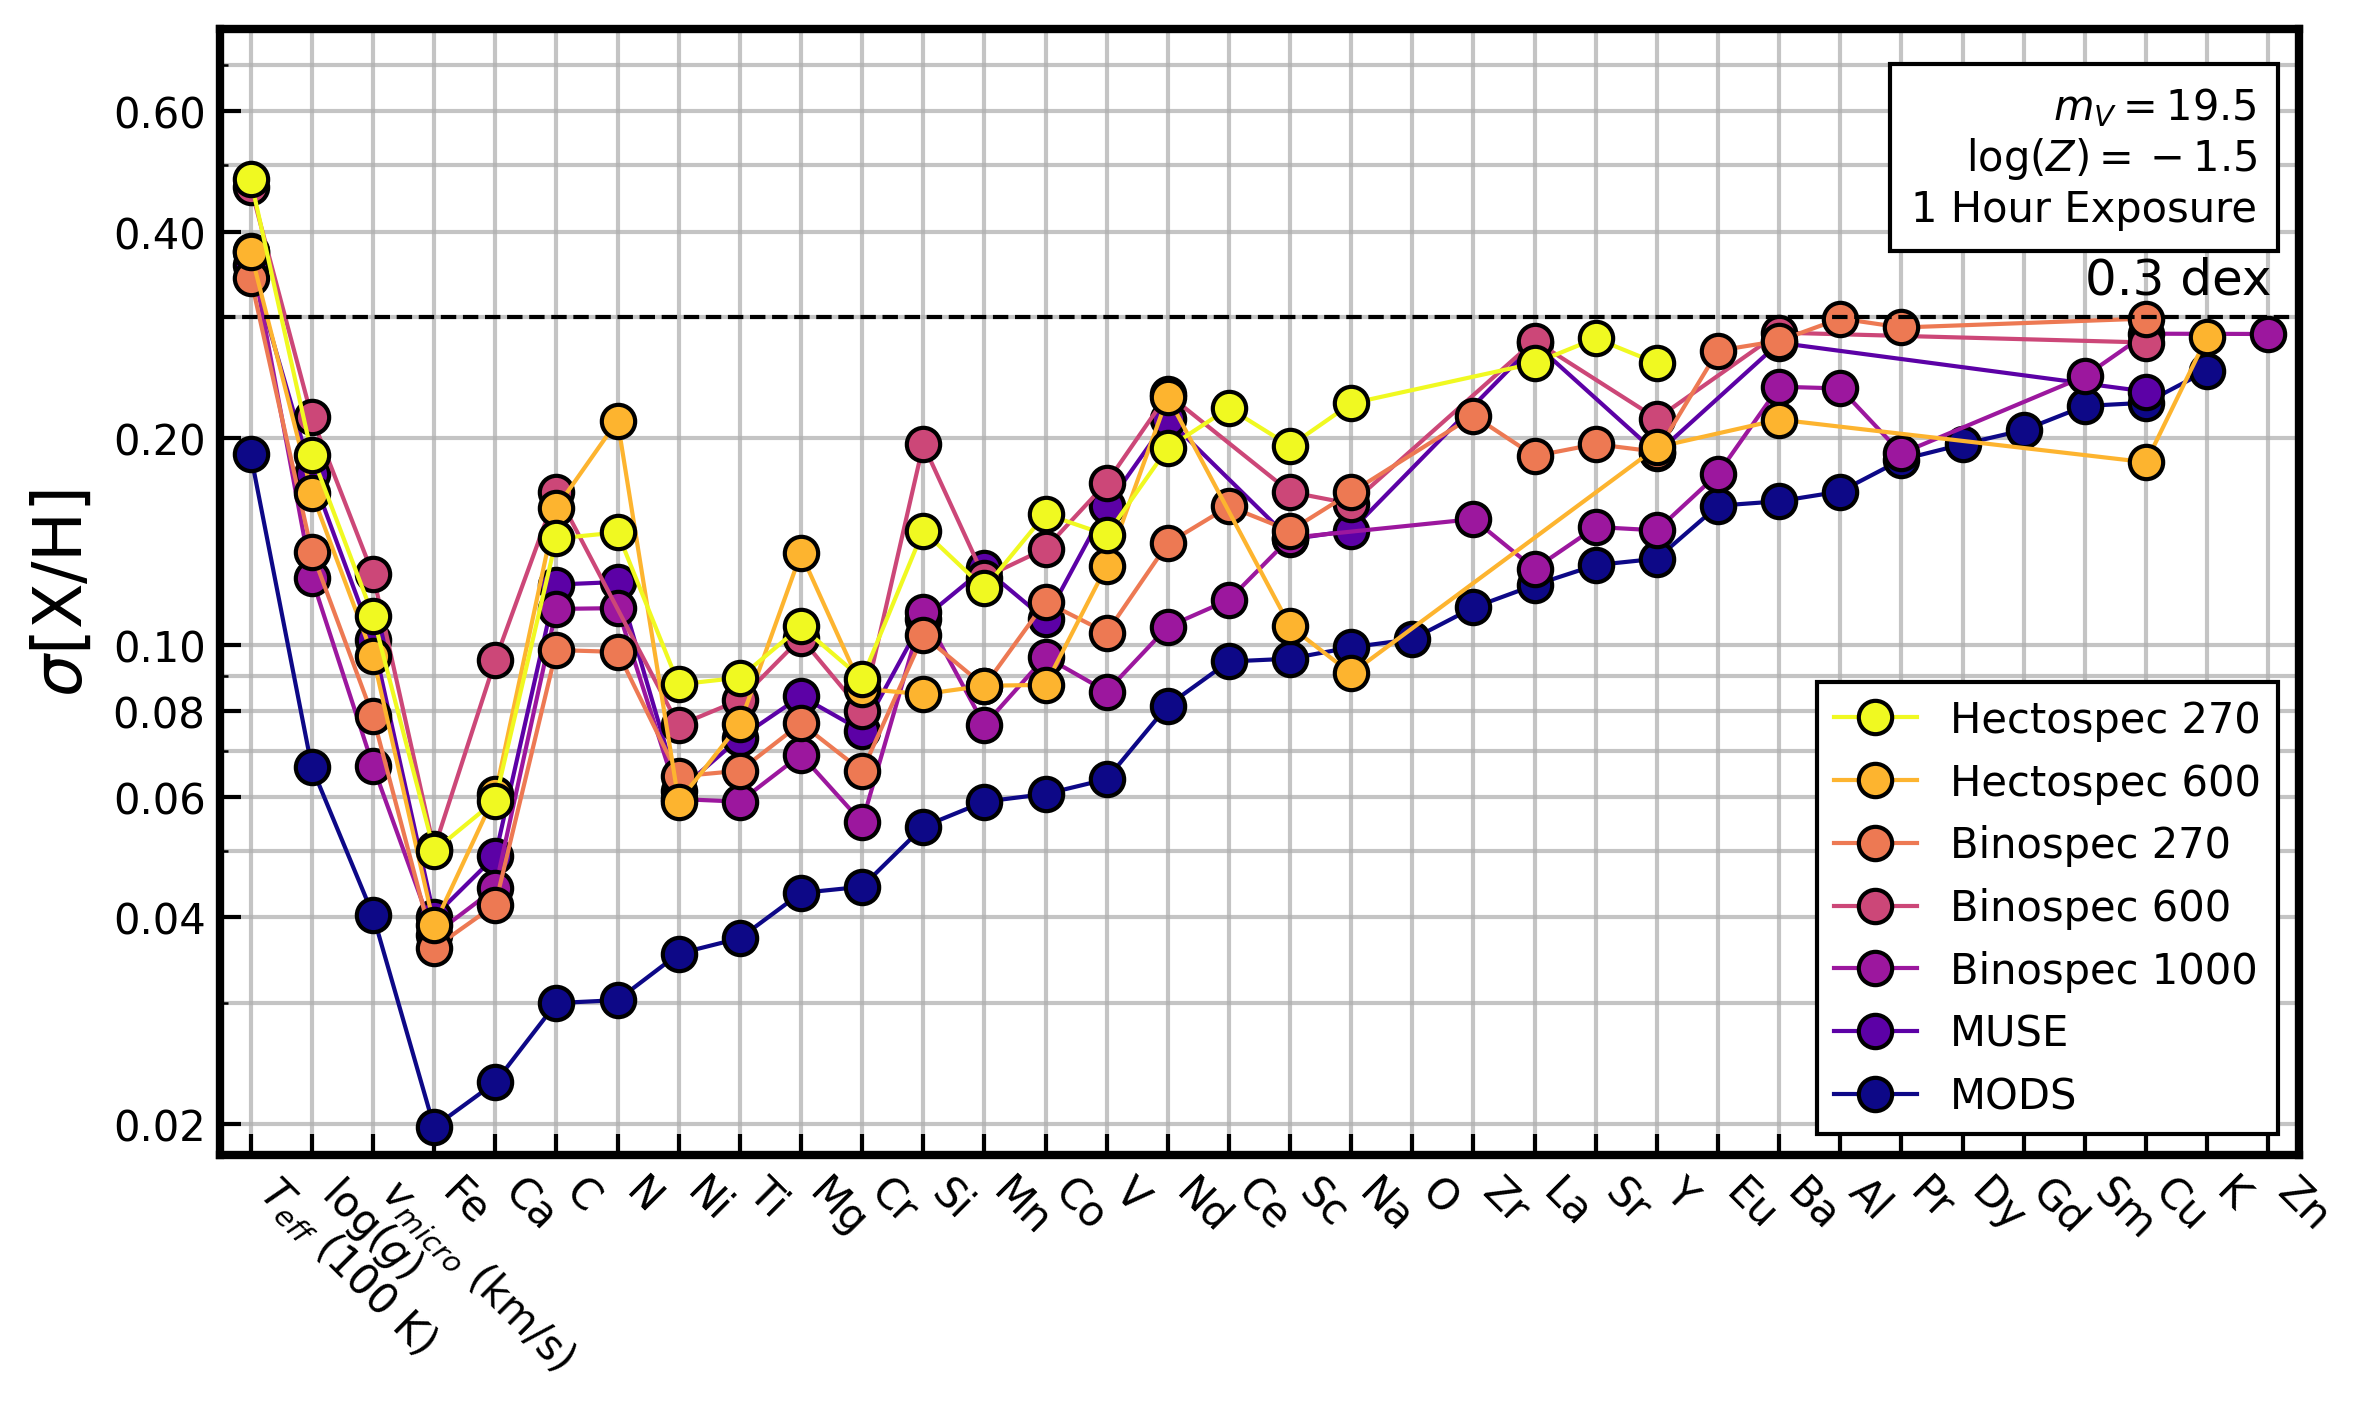

In [17]:
fig = plot_crlb([CRLB_other_blue],
                 labels=['$m_V=19.5$\n$\log(Z)=-1.5$\n1 Hour Exposure'],
                 ylim=(0.018, 0.79),
                 yticks=[0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6],
                 cutoff=0.3, cutoff_label_xoffset=4.0, cutoff_label_yoffset=0.025,
                 panel_height=4.8, legend_ncol=1, reverse_legend=True)
fig.savefig(output_dir+'crlb_other.png')

## Figure 10: High-Resolution, Single Slit CRLBs

In [18]:
# Initialize Preset Instrument
hires_10 = inst.AllInst.get_spectrograph('HIRESr 1.0"')
hires_08 = inst.AllInst.get_spectrograph('HIRESr 0.8"')
mike_r = inst.AllInst.get_spectrograph('MIKE 1" (r)')
mike_b = inst.AllInst.get_spectrograph('MIKE 1" (b)')
xshoot_uvb = inst.AllInst.get_spectrograph('XSHOOTER (UVB)')
xshoot_vis = inst.AllInst.get_spectrograph('XSHOOTER (VIS)')
xshoot_nir = inst.AllInst.get_spectrograph('XSHOOTER (NIR)')
uves = inst.AllInst.get_spectrograph('UVES (r580)')

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
RGB.convolve(hires_10)
RGB.convolve(hires_08)
RGB.convolve(mike_r)
RGB.convolve(mike_b)
RGB.convolve(xshoot_uvb)
RGB.convolve(xshoot_vis)
RGB.convolve(xshoot_nir)
RGB.convolve(uves)

# Calculate Gradient Spectra
RGB.calc_gradient(hires_10)
RGB.calc_gradient(hires_08)
RGB.calc_gradient(mike_r)
RGB.calc_gradient(mike_b)
RGB.calc_gradient(xshoot_uvb)
RGB.calc_gradient(xshoot_vis)
RGB.calc_gradient(xshoot_nir)
RGB.calc_gradient(uves)

# Set S/N for All Instruments
m_V = 19.5
# HIRES 1".0
hires10_snr_query = s2n.Sig2NoiseHIRES(slitwidth='C5', exptime=6*3600,
                                       mag=19.5, magtype='Vega', band='Buser_V.dat',
                                       template='K0V_pickles_32.fits', binning='2x2',
                                       airmass=1.1, seeing=0.75, redshift=0)
hires_10.set_snr(hires10_snr_query, fill_value='extrapolate')
# HIRES 0".8
hires08_snr_query = s2n.Sig2NoiseHIRES(slitwidth='B5', exptime=6*3600,
                                       mag=19.5, magtype='Vega', band='Buser_V.dat',
                                       template='K0V_pickles_32.fits', binning='2x2',
                                       airmass=1.1, seeing=0.75, redshift=0)
hires_08.set_snr(hires08_snr_query, fill_value='extrapolate')
# MIKE
miker_snr_query = s2n.Sig2NoiseMIKE(mode="RED", exptime=6*3600, mag=19.8, band="g", template="K0V",
                                    slitwidth=1.0, extract_ap=1.0, binspat="3", binspec="1",
                                    seeing=0.75, airmass=1.1, nmoon="0")
mike_r.set_snr(miker_snr_query, fill_value='extrapolate')  # There's a chance that this request may timeout. Just try again if it does.
mikeb_snr_query = s2n.Sig2NoiseMIKE(mode="BLUE", exptime=6*3600, mag=19.8, band="g", template="K0V",
                                    slitwidth=1.0, extract_ap=1.0, binspat="3", binspec="1",
                                    seeing=0.75, airmass=1.1, nmoon="0")
mike_b.set_snr(mikeb_snr_query, fill_value='extrapolate')  # There's a chance that this request may timeout. Just try again if it does.
# XSHOOTER
xshooter_snr_query = s2n.Sig2NoiseXSHOOTER(exptime=6*3600,
                                           uvb_slitwidth='0.8', vis_slitwidth='0.7', nir_slitwidth='0.9',
                                           uvb_ccd_binning='high1x1slow', vis_ccd_binning='high1x1slow',
                                           mag=19.5, band='V', magtype='Vega',
                                           template_type='template_spectrum', template='Pickles_K2V',
                                           airmass=1.1, seeing='0.8', moon_phase=0, redshift=0)
xshoot_uvb.set_snr(xshooter_snr_query, fill_value='extrapolate')
xshoot_vis.set_snr(xshooter_snr_query, fill_value='extrapolate')
xshoot_nir.set_snr(xshooter_snr_query, fill_value='extrapolate')
# UVES
uves_snr_query = s2n.Sig2NoiseFLAMESUVES(exptime=6*3600, detector='Red__580',
                                         mag=19.5, band='V', magtype='Vega',
                                         template_type='template_spectrum', template='Pickles_K2V',
                                         airmass=1.1, seeing='0.8', moon_phase=0, redshift=0, mid_order_only=False)
uves.set_snr(uves_snr_query, fill_value='extrapolate')

# Initialize CRLB Data Frames
CRLB_highres_single = init_crlb_df(RGB)

# Calculate CRLBs
CRLB_highres_single[hires_08.name] = calc_crlb(RGB, hires_08)
CRLB_highres_single[hires_10.name] = calc_crlb(RGB, hires_10)
CRLB_highres_single['X-SHOOTER'] = calc_crlb(RGB, [xshoot_uvb, xshoot_vis, xshoot_nir])
CRLB_highres_single['MIKE'] = calc_crlb(RGB, [mike_r, mike_b])
CRLB_highres_single['UVES'] = calc_crlb(RGB, uves)

# Sort CRLBs & Pretty Up Indices
CRLB_highres_single = sort_crlb(CRLB_highres_single, cutoff=0.3, fancy_labels=True)

/Users/nathansandford/github_repos/Chem-I-Calc/chemicalc/utils.py:160: UserWarning: outwave ((3000.0, 5500.024218408431)) extends beyond input wave ((3000.0040572, 17999.9801449))
  UserWarning,
/Users/nathansandford/github_repos/Chem-I-Calc/chemicalc/utils.py:160: UserWarning: outwave ((10200.0, 18000.7019720807)) extends beyond input wave ((3000.0040572, 17999.9801449))
  UserWarning,
/Users/nathansandford/github_repos/Chem-I-Calc/chemicalc/crlb.py:82: RuntimeWarning: divide by zero encountered in power
  flux_var = instrument.snr ** (-2)


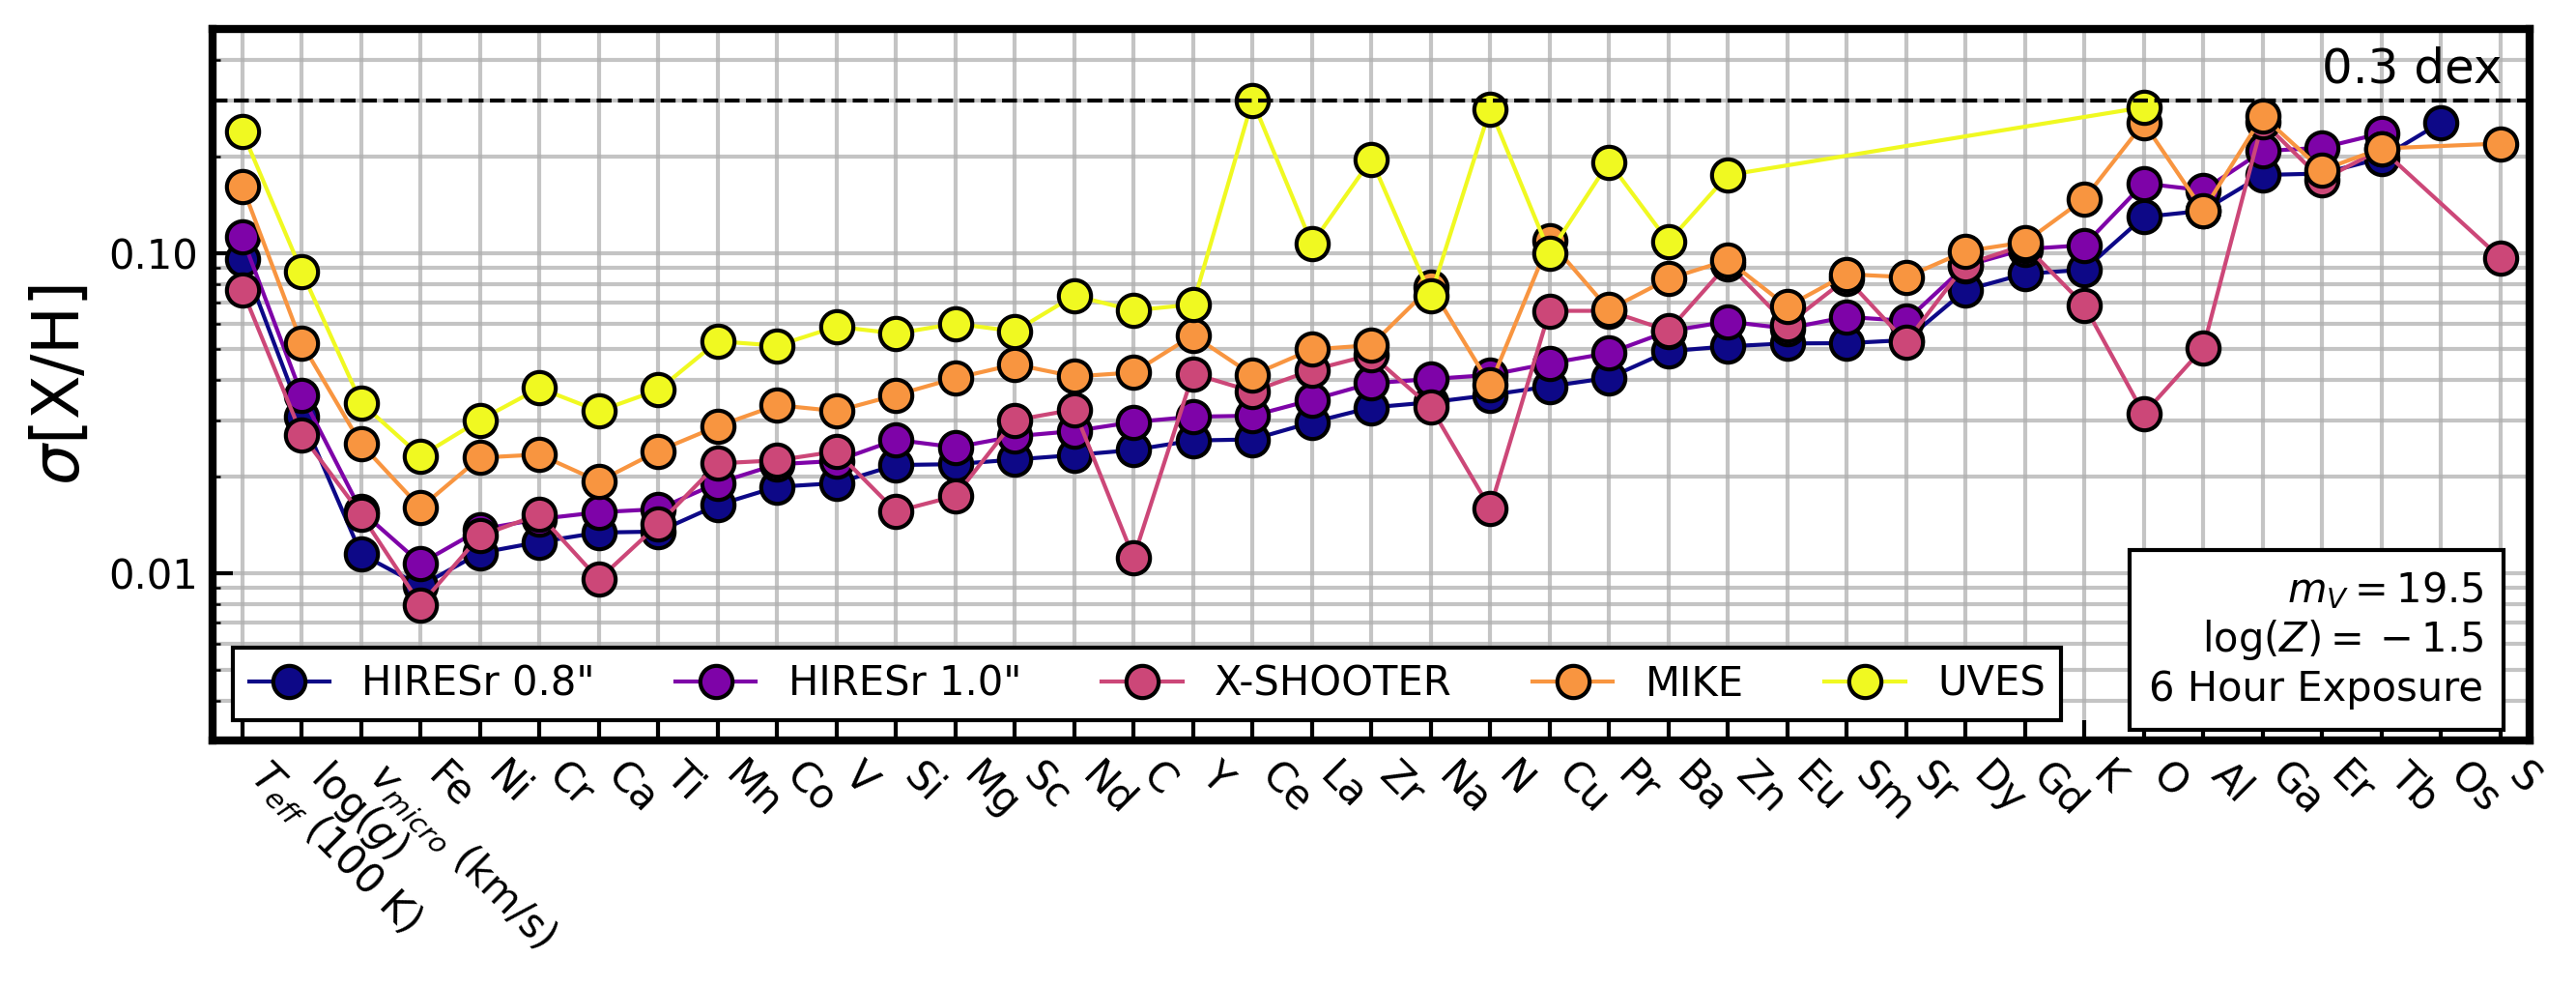

In [19]:
fig = plot_crlb([CRLB_highres_single],
                 labels=['$m_V=19.5$\n$\log(Z)=-1.5$\n6 Hour Exposure'], label_loc=[0.98, 0.24],
                 cutoff=0.3, cutoff_label_xoffset=4, cutoff_label_yoffset=0.04,
                 ylim=(0.003, 0.5), panel_height=3.5, panel_width=9,
                 legend_loc='lower left', legend_ncol=5)
fig.savefig(output_dir+'crlb_highres1.png')

## Figure 11: High-Resolution, Single Order CRLBs

In [18]:
# Initialize Preset Instrument
giraffe_lr8 = inst.AllInst.get_spectrograph('GIRAFFE LR8')
giraffe_hr10 = inst.AllInst.get_spectrograph('GIRAFFE HR10')
giraffe_hr13 = inst.AllInst.get_spectrograph('GIRAFFE HR13')
giraffe_hr14A = inst.AllInst.get_spectrograph('GIRAFFE HR14A')
giraffe_hr15 = inst.AllInst.get_spectrograph('GIRAFFE HR15')
hectochelle = inst.AllInst.get_spectrograph('Hectochelle')
m2fs_med = inst.AllInst.get_spectrograph('M2FS MedRes')
m2fs_hi = inst.AllInst.get_spectrograph('M2FS HiRes')

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5')

# Convolve Reference Spectra to Instrument Resolution
RGB.convolve(giraffe_lr8)
RGB.convolve(giraffe_hr10)
RGB.convolve(giraffe_hr13)
RGB.convolve(giraffe_hr14A)
RGB.convolve(giraffe_hr15)
RGB.convolve(hectochelle)
RGB.convolve(m2fs_med)
RGB.convolve(m2fs_hi)

# Calculate Gradient Spectra
RGB.calc_gradient(giraffe_lr8)
RGB.calc_gradient(giraffe_hr10)
RGB.calc_gradient(giraffe_hr13)
RGB.calc_gradient(giraffe_hr14A)
RGB.calc_gradient(giraffe_hr15)
RGB.calc_gradient(hectochelle)
RGB.calc_gradient(m2fs_med)
RGB.calc_gradient(m2fs_hi)

# Set S/N for All Instruments
# FLAMES-GIRAFFE
giraffe_lr8_snr_query = s2n.Sig2NoiseFLAMESGIRAFFE(exptime=6*3600, slicer='LR08',
                                                   sky_sampling_mode='MEDUSA', ccd_mode='standard', fiber_obj_decenter=0.0,
                                                   mag=19.5, band='V', magtype='Vega',
                                                   template_type='template_spectrum', template='Pickles_K2V',
                                                   airmass=1.1, seeing='0.8', moon_phase=0, redshift=0)
giraffe_hr10_snr_query = s2n.Sig2NoiseFLAMESGIRAFFE(exptime=6*3600, slicer='HR10',
                                                    sky_sampling_mode='MEDUSA', ccd_mode='standard', fiber_obj_decenter=0.0,
                                                    mag=19.5, band='V', magtype='Vega',
                                                    template_type='template_spectrum', template='Pickles_K2V',
                                                    airmass=1.1, seeing='0.8', moon_phase=0, redshift=0)
giraffe_hr13_snr_query = s2n.Sig2NoiseFLAMESGIRAFFE(exptime=6*3600, slicer='HR13',
                                                    sky_sampling_mode='MEDUSA', ccd_mode='standard', fiber_obj_decenter=0.0,
                                                    mag=19.5, band='V', magtype='Vega',
                                                    template_type='template_spectrum', template='Pickles_K2V',
                                                    airmass=1.1, seeing='0.8', moon_phase=0, redshift=0)
giraffe_hr14A_snr_query = s2n.Sig2NoiseFLAMESGIRAFFE(exptime=6*3600, slicer='HR14A',
                                                     sky_sampling_mode='MEDUSA', ccd_mode='standard', fiber_obj_decenter=0.0,
                                                     mag=19.5, band='V', magtype='Vega',
                                                     template_type='template_spectrum', template='Pickles_K2V',
                                                     airmass=1.1, seeing='0.8', moon_phase=0, redshift=0)
giraffe_hr15_snr_query = s2n.Sig2NoiseFLAMESGIRAFFE(exptime=6*3600, slicer='HR15',
                                                    sky_sampling_mode='MEDUSA', ccd_mode='standard', fiber_obj_decenter=0.0,
                                                    mag=19.5, band='V', magtype='Vega',
                                                    template_type='template_spectrum', template='Pickles_K2V',
                                                    airmass=1.1, seeing='0.8', moon_phase=0, redshift=0)
giraffe_lr8.set_snr(giraffe_lr8_snr_query, fill_value='extrapolate')
giraffe_hr10.set_snr(giraffe_hr10_snr_query, fill_value='extrapolate')
giraffe_hr13.set_snr(giraffe_hr13_snr_query, fill_value='extrapolate')
giraffe_hr14A.set_snr(giraffe_hr14A_snr_query, fill_value='extrapolate')
giraffe_hr15.set_snr(giraffe_hr15_snr_query, fill_value='extrapolate')
# Hectochelle (from FLAMES-GIRAFFE)
hectochelle_snr = float(np.mean(giraffe_hr10.snr) * (6.5/8.2)  # Scale by telescope aperture
                        * (hectochelle.R_res/giraffe_hr10.R_res)**(-1/2)  # Scale by resolving power
                        * (hectochelle.R_samp/giraffe_hr10.R_samp)**(-1/2)  # Scale by wavelength sampling
                       )
hectochelle.set_snr(hectochelle_snr, fill_value='extrapolate')
# M2FS (from FLAMES-GIRAFFE)
M2FS_med_snr = float(np.mean(giraffe_hr10.snr) 
                     * (6.5/8.2)  # Scale by telescope aperture
                     * (m2fs_med.R_res/giraffe_hr10.R_res)**(-1/2)  # Scale by resolving power
                    )
m2fs_med.set_snr(M2FS_med_snr, fill_value='extrapolate')
M2FS_hi_snr = float(np.mean(giraffe_hr10.snr)
                    * (6.5/8.2)  # Scale by telescope aperture
                    * (m2fs_hi.R_res/giraffe_hr10.R_res)**(-1/2)  # Scale by resolving power
                   )
m2fs_hi.set_snr(M2FS_hi_snr, fill_value='extrapolate')

# Initialize CRLB Data Frames
CRLB_highres_MOS1 = init_crlb_df(RGB)
CRLB_highres_MOS2 = init_crlb_df(RGB)

# Calculate CRLBs
CRLB_highres_MOS1['GIRAFFE (all)'] = calc_crlb(RGB, [giraffe_lr8, giraffe_hr10,
                                                     giraffe_hr13, giraffe_hr14A,
                                                     giraffe_hr15])
CRLB_highres_MOS1[giraffe_lr8.name] = calc_crlb(RGB, giraffe_lr8)
CRLB_highres_MOS1[giraffe_hr10.name] = calc_crlb(RGB, giraffe_hr10)
CRLB_highres_MOS1[giraffe_hr13.name] = calc_crlb(RGB, giraffe_hr13)
CRLB_highres_MOS1[giraffe_hr14A.name] = calc_crlb(RGB, giraffe_hr14A)
CRLB_highres_MOS1[giraffe_hr15.name] = calc_crlb(RGB, giraffe_hr15)
CRLB_highres_MOS2[hectochelle.name] = calc_crlb(RGB, hectochelle)
CRLB_highres_MOS2[m2fs_med.name] = calc_crlb(RGB, m2fs_med)
CRLB_highres_MOS2[m2fs_hi.name] = calc_crlb(RGB, m2fs_hi)

# Sort CRLBs & Pretty Up Indices
CRLB_highres_MOS1 = sort_crlb(CRLB_highres_MOS1, cutoff=0.3, fancy_labels=True)
CRLB_highres_MOS2 = sort_crlb(CRLB_highres_MOS2, cutoff=0.3, fancy_labels=True)

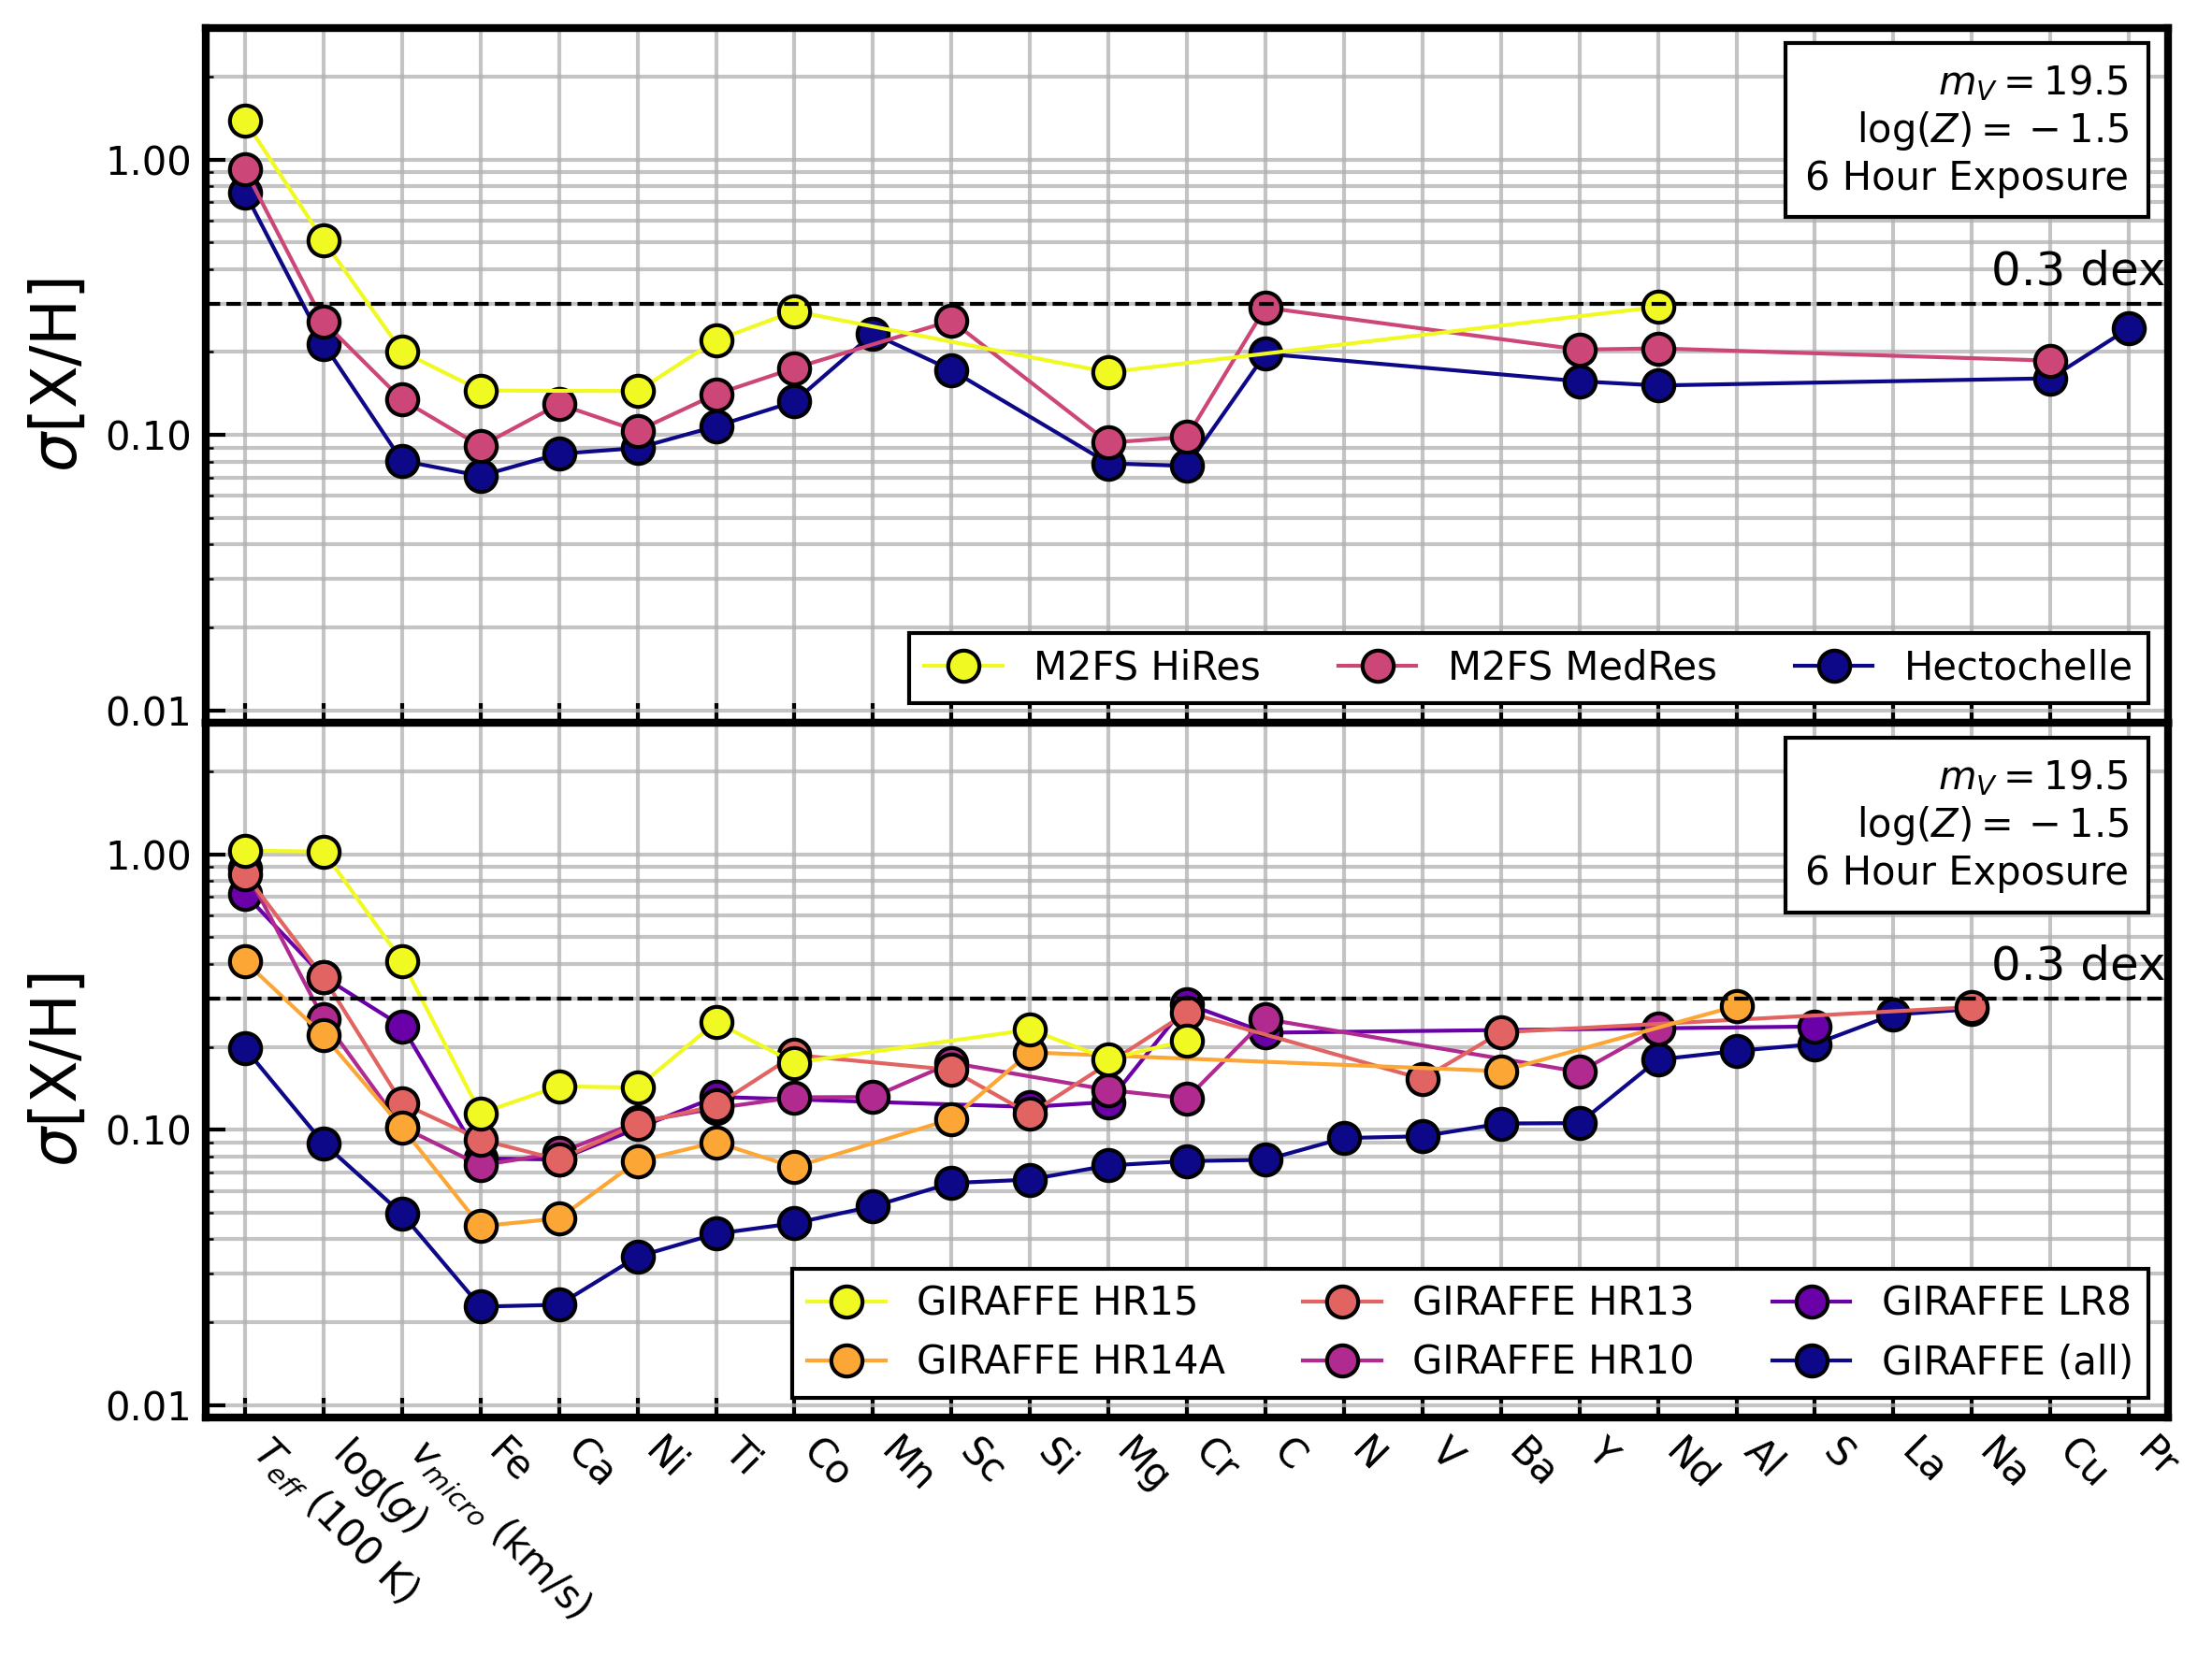

In [19]:
fig = plot_crlb([CRLB_highres_MOS2, CRLB_highres_MOS1],
                 labels=['$m_V=19.5$\n$\log(Z)=-1.5$\n6 Hour Exposure',
                         '$m_V=19.5$\n$\log(Z)=-1.5$\n6 Hour Exposure'],
                 cutoff=0.3, cutoff_label_xoffset=2.75,
                 ylim=(0.009, 3.0),
                 legend_loc='lower right', legend_ncol=3, reverse_legend=True)
fig.savefig(output_dir+'crlb_highres2.png')